# Исследование объявлений о продаже квартир

Даны данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости.

Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Шаг 1. Откройте файл с данными и изучите общую информацию.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stc
import seaborn as sb
import warnings

In [ ]:
data=pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv',sep='\t')
data.index.name='row_number'
old_data=data
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
row_number,,,,,,,,,,,,,,,,,,,,,
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

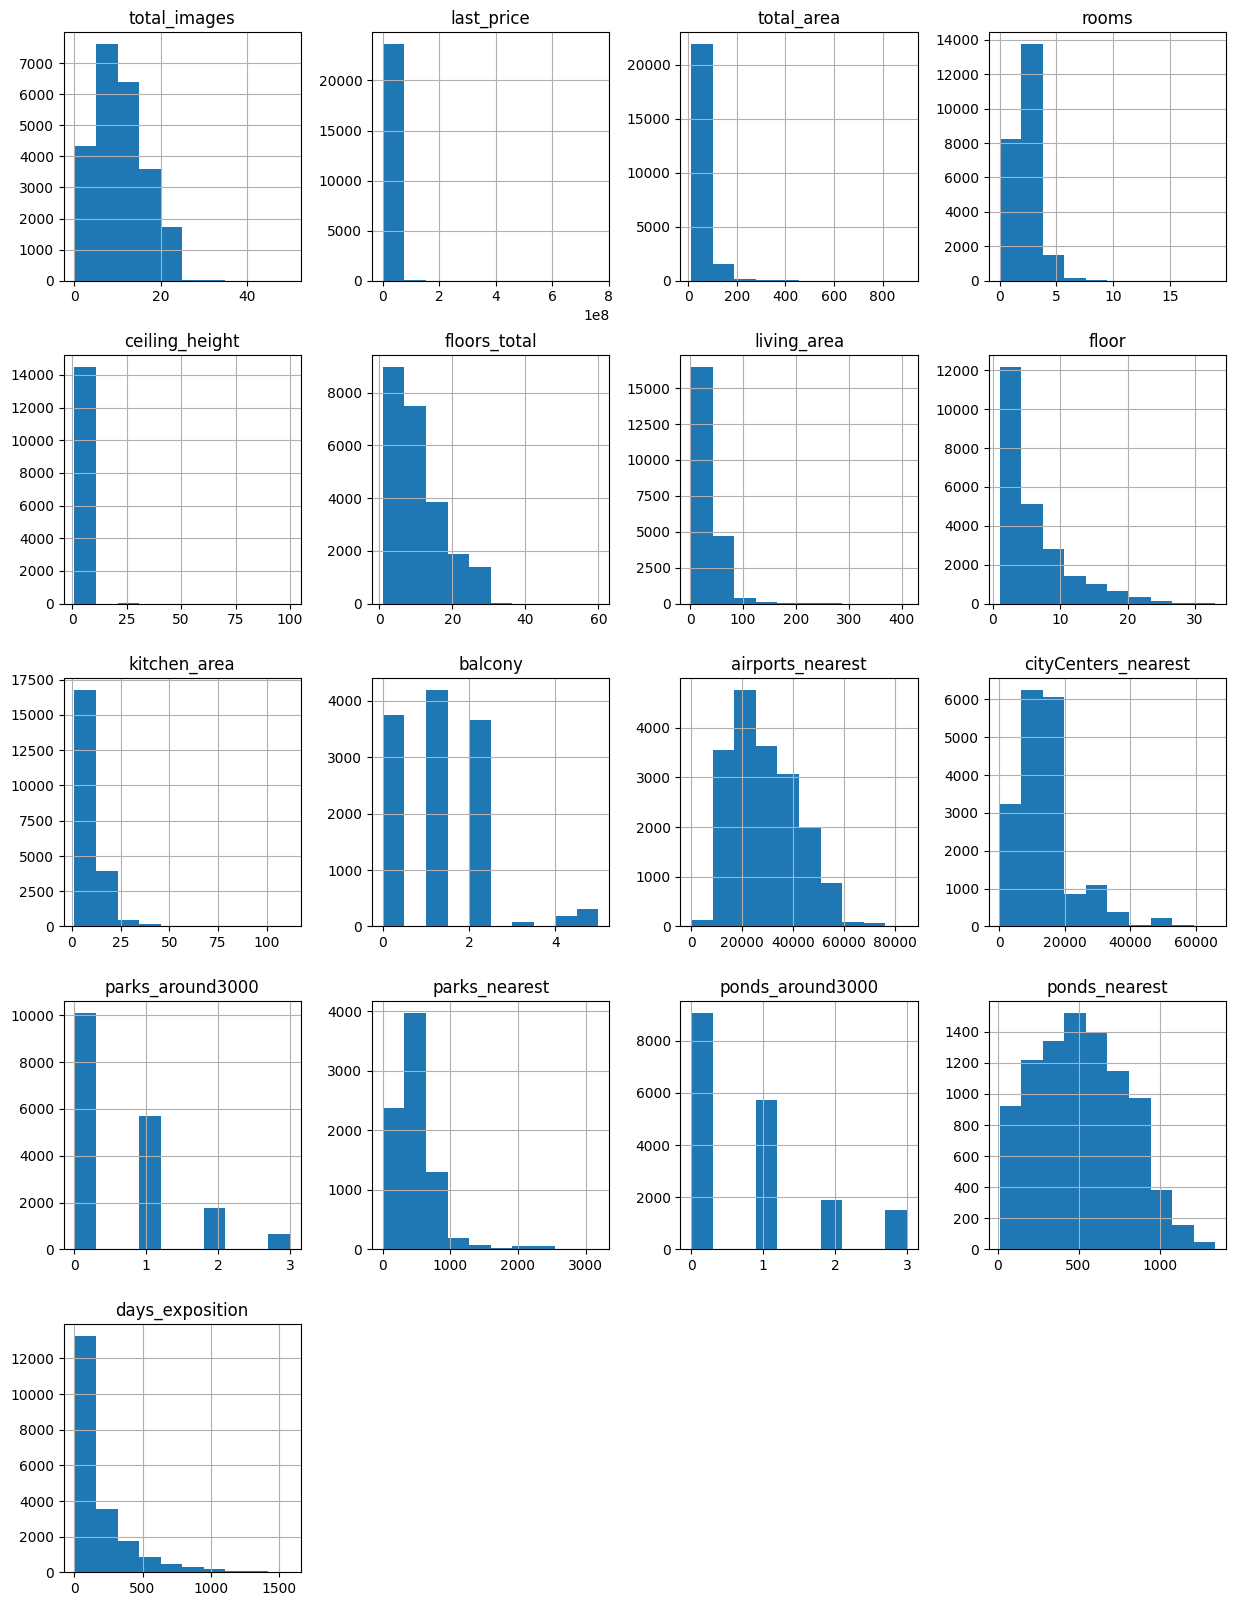

In [ ]:
data.hist(figsize=(15,20));

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Пока рано делать какие-либо выводы, можно только сказать что давально много гистограмм внешение похожи на распределение Паусона. Так же нужно изменить типы даннх. Не информативны гистограммы с высотой потолков, последней ценой и площадаями.


### Шаг 2. Предобработка данных

In [ ]:
pd.DataFrame({'qty_of_gap':data.isna().sum()})

,qty_of_gap
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,9195
floors_total,86
living_area,1903
floor,0
is_apartment,20924


In [ ]:
data['balcony'].isna().value_counts()

False    12180
True     11519
Name: balcony, dtype: int64

In [ ]:
data['balcony']=data['balcony'].fillna(0)

In [ ]:
data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

In [ ]:
data['parks_around3000']=data['parks_around3000'].fillna(0)

Если не указано информация про колличетво парков - то присвоим пропускам их отсутвие (0).

In [ ]:
data['ponds_around3000']=data['ponds_around3000'].fillna(0)

Если не указано информация про колличетво парков - то присвоим пропускам их отсутвие (0).

Польователям просто не хочется заполнять эти данные - им кажется что это лишние действия которые ни на что не влияют

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Посмотрим какие типы данных нужно изменить

In [ ]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [ ]:
data['is_apartment']=data['is_apartment'].astype('bool')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Изменил типы данных - ушел от данных типа object, где это необходимо

1. Причины неправильности типов данных: неправильный ввод данных - например ввели булевы данные без из тип а просто в object
Так же ввели даты без формата даты

2. Нужно изменить тип данных что бы можно было пользоваться функциями даты или добовлять в булевы условия столбец is_apartment

In [ ]:
data['balcony'].name

'balcony'

In [ ]:
data['balcony']=data['balcony'].astype('int')
print(f'Тепер тип данных поля {data["balcony"].name} - {np.dtype(data["balcony"])}')

Тепер тип данных поля balcony - int64


Далее займемся удалением дубликатов в навзании мест.

In [ ]:
len(data['locality_name'].unique())

365

In [ ]:
#data['locality_name']=data['locality_name'].str.replace('поселок','посёлок')

In [ ]:
#########place_type=['городской поселок','поселок городского типа','село','поселок','деревня','коттеджный поселок','городской пок','пок','пок станции','при железнодорожной станциии','садовое товарищество','при станции','станции']
data['locality_name']=data['locality_name'].str.replace('садоводческое некоммерческое товарищество ','')
data['locality_name']=data['locality_name'].str.replace(' при железнодорожной станциии','')
data['locality_name']=data['locality_name'].str.replace('при железнодорожной станциии ','')
data['locality_name']=data['locality_name'].str.replace(' поселок городского типа','')
data['locality_name']=data['locality_name'].str.replace('поселок городского типа ','')
data['locality_name']=data['locality_name'].str.replace('посёлок городского типа ','')
data['locality_name']=data['locality_name'].str.replace('посёлок городского типа ','')
data['locality_name']=data['locality_name'].str.replace(' посёлок городского типа','')
data['locality_name']=data['locality_name'].str.replace('при железнодорожной ','')
data['locality_name']=data['locality_name'].str.replace('городской поселок ','')
data['locality_name']=data['locality_name'].str.replace(' городской поселок','')
data['locality_name']=data['locality_name'].str.replace('городской посёлок ','')
data['locality_name']=data['locality_name'].str.replace(' городской посёлок','')
data['locality_name']=data['locality_name'].str.replace('коттеджный поселок ','')
data['locality_name']=data['locality_name'].str.replace('коттеджный посёлок ','')
data['locality_name']=data['locality_name'].str.replace('садовое товарищество ','')
data['locality_name']=data['locality_name'].str.replace(' садовое товарищество','')
data['locality_name']=data['locality_name'].str.replace(' коттеджный поселок','')
data['locality_name']=data['locality_name'].str.replace(' коттеджный посёлок','')
data['locality_name']=data['locality_name'].str.replace('городского типа ','')
data['locality_name']=data['locality_name'].str.replace('городской пок ','')
data['locality_name']=data['locality_name'].str.replace('при станции ','')
data['locality_name']=data['locality_name'].str.replace('пок станции ','')
data['locality_name']=data['locality_name'].str.replace(' городской пок','')
data['locality_name']=data['locality_name'].str.replace(' пок станции','')
data['locality_name']=data['locality_name'].str.replace(' при станции','')
data['locality_name']=data['locality_name'].str.replace('село','')
data['locality_name']=data['locality_name'].str.replace('поселок ','')
data['locality_name']=data['locality_name'].str.replace('деревня ','')
data['locality_name']=data['locality_name'].str.replace('пок ','')
data['locality_name']=data['locality_name'].str.replace('станции ','')
data['locality_name']=data['locality_name'].str.replace(' село','')
data['locality_name']=data['locality_name'].str.replace(' поселок','')
data['locality_name']=data['locality_name'].str.replace(' посёлок','')
data['locality_name']=data['locality_name'].str.replace('посёлок ','')
data['locality_name']=data['locality_name'].str.replace(' деревня','')
data['locality_name']=data['locality_name'].str.replace(' пок','')
data['locality_name']=data['locality_name'].str.replace(' станции','')
data['locality_name']=data['locality_name'].str.replace('коттеджный ','')


len(data['locality_name'].unique())

308

In [ ]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       ' Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       ' Павлово', 'Оредеж', ' Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорс

Как видно выше - проблема дубликатов полностью решена

Проеврим и остальные данные на дубликаты, выбросы и ошибки

In [ ]:
data['ceiling_height'].value_counts().sort_index().head(20)

1.00       1
1.20       1
1.75       1
2.00      11
2.20       1
2.25       1
2.30       4
2.34       1
2.40      23
2.45      15
2.46       2
2.47       3
2.48       8
2.49       1
2.50    3515
2.51      34
2.52      79
2.53      67
2.54      83
2.55     980
Name: ceiling_height, dtype: int64

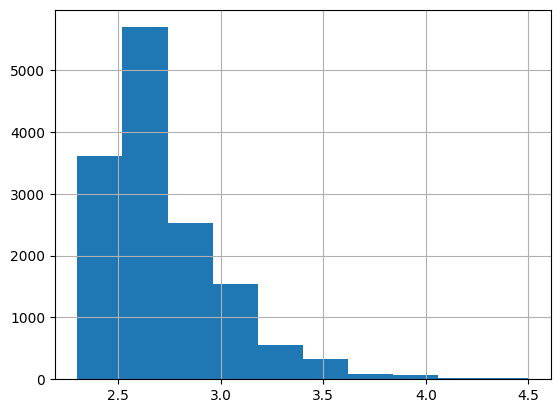

In [ ]:
data['ceiling_height'].hist(bins=10,range=(2.3,4.5));

Сегодня минимальной нормой в России считается высота потолка 2,4 метра.
Если допустить что у кого-то есть натяжные потолки(обычно до 5 см но бывает и чуть больше) и пол при ремонте поднялся на несколько сантиметров - то можно принять максимальное снижение расстояние от потолка до пола около 10 см- значит учитывая нормы и максимальное принятое снижение - минимальное расстояние от потолка от пола будет равно 2,3 метра - все что ниже примим как ошибку и заменим на мединное значение
-------------------------------------------------------------------------------
https://stone-floor.ru/stati/optimalnaya-visota-potolka#:~:text=%D0%A1%D0%B5%D0%B3%D0%BE%D0%B4%D0%BD%D1%8F%20%D0%BC%D0%B8%D0%BD%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9%20%D0%BD%D0%BE%D1%80%D0%BC%D0%BE%D0%B9%20%D0%B2%20%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8,%D0%BF%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%20%D0%BC%D0%BE%D0%B6%D0%B5%D1%82%20%D0%BF%D1%80%D0%B5%D0%B2%D1%8B%D1%88%D0%B0%D1%82%D1%8C%203%20%D0%BC%D0%B5%D1%82%D1%80%D0%B0.

Так же далее уберем ошибки в данных и выбросы.

In [ ]:
height_median=data['ceiling_height'].median()
height_median

2.65

In [ ]:
data['ceiling_height'].value_counts().sort_index().tail(30)

4.25      1
4.30      1
4.37      1
4.40      3
4.45      2
4.50      7
4.65      1
4.70      2
4.80      1
4.90      1
5.00      1
5.20      1
5.30      2
5.50      1
5.60      1
5.80      1
6.00      1
8.00      3
8.30      1
10.30     1
14.00     1
20.00     1
22.60     1
24.00     1
25.00     7
26.00     1
27.00     8
27.50     1
32.00     2
100.00    1
Name: ceiling_height, dtype: int64

In [ ]:
rows=(data['ceiling_height']>23)&(data['ceiling_height']<60)
data.loc[rows,'ceiling_height']=round(data['ceiling_height']/10,1)
data['ceiling_height'].value_counts().sort_index().tail(30)

4.06       1
4.10       3
4.14       1
4.15       1
4.19       2
4.20      10
4.25       1
4.30       1
4.37       1
4.40       3
4.45       2
4.50       7
4.65       1
4.70       2
4.80       1
4.90       1
5.00       1
5.20       1
5.30       2
5.50       1
5.60       1
5.80       1
6.00       1
8.00       3
8.30       1
10.30      1
14.00      1
20.00      1
22.60      1
100.00     1
Name: ceiling_height, dtype: int64

In [ ]:
data['ceiling_height_status']='Ошибки нет.'
data.loc[data['ceiling_height']<2.3,'ceiling_height_status']='Ошибка. Слишком низко.'
data.loc[data['ceiling_height']>=8,'ceiling_height_status']='Ошибка. Слишком высоко.'
data.loc[data['ceiling_height']<2.3,'ceiling_height']=height_median
data.loc[data['ceiling_height']>=8,'ceiling_height']=height_median
data['ceiling_height_status'].unique()

array(['Ошибки нет.', 'Ошибка. Слишком низко.', 'Ошибка. Слишком высоко.'],
      dtype=object)

In [ ]:
data['ceiling_height'].value_counts().sort_index().head(30)

2.30       4
2.34       1
2.40      24
2.45      15
2.46       2
2.47       3
2.48       8
2.49       1
2.50    3522
2.51      34
2.52      79
2.53      67
2.54      83
2.55     980
2.56     139
2.57     103
2.58      63
2.59      14
2.60    1647
2.61       5
2.62      14
2.63      13
2.64      81
2.65     701
2.66      17
2.67      36
2.68      23
2.69       2
2.70    1582
2.71      13
Name: ceiling_height, dtype: int64

In [ ]:
data['ceiling_height'].unique()

array([2.7 ,  nan, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57,
       4.15, 3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 ,
       3.06, 2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 5.2 , 2.87,
       2.66, 2.59, 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16,
       3.62, 3.12, 2.53, 2.74, 2.96, 2.46, 5.3 , 5.  , 2.79, 2.95, 4.06,
       2.94, 3.82, 3.54, 3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 5.6 , 3.65,
       3.9 , 3.18, 3.35, 2.3 , 3.57, 2.48, 2.62, 2.82, 3.98, 2.63, 3.83,
       3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19, 3.24,
       4.8 , 4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 3.26, 3.34,
       2.81, 3.44, 2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 , 2.93, 3.46,
       3.47, 3.33, 3.63, 3.32, 2.98, 2.86, 3.17, 4.4 , 3.28, 3.04, 4.45,
       5.5 , 3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 4.3 , 3.39, 2.69, 3.31,
       4.65, 3.56, 3.51, 3.93, 3.42, 2.99, 3.49, 4.

In [ ]:
data.query('airports_nearest==0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_status
row_number,,,,,,,,,,,,,,,,,,,,,
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9.0,19.8,3,True,...,2,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0,Ошибки нет.


In [ ]:
data['airports_nearest'].value_counts().sort_index()

0.0        1
6450.0     2
6914.0     1
6949.0     1
6989.0     6
          ..
83758.0    1
84006.0    1
84665.0    1
84853.0    1
84869.0    1
Name: airports_nearest, Length: 8275, dtype: int64

In [ ]:
data.loc[data['airports_nearest']==0,'airports_nearest']=data['airports_nearest'].median()

In [ ]:
data.query('airports_nearest==0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_status
row_number,,,,,,,,,,,,,,,,,,,,,


Проверка что никто больше не живет в аэропоту)
по поводу верхних значений - нет таких знаний (у меня) что бы сделать вывод что расстояния от какого-нибудь отдаленного села в Лениградской области до ближайшего аэропорта не может быть 84 км.

In [ ]:
data['cityCenters_nearest'].value_counts().sort_index().tail(20)

53294.0    1
53379.0    1
53383.0    1
53568.0    2
54214.0    1
54490.0    1
54646.0    1
54926.0    1
56745.0    1
59052.0    1
59626.0    1
60223.0    1
61495.0    1
62454.0    1
62706.0    1
64857.0    1
65105.0    1
65764.0    1
65952.0    1
65968.0    1
Name: cityCenters_nearest, dtype: int64

верхние значения вызывают подозрение - не может быть город с радиусом до крайней точки 60 км - Питер 2 по площади город в России и довольно сам по себе крупные (крупнее другие городв в ленобласти). Его площадь 1439 кв.км, а значит можно посчитать и его средний радиус - потому что город сам по себе довольно круглый.
https://migranturus.com/15-samyh-bolshih-po-ploshchadi-gorodov-rossii/

In [ ]:
from math import sqrt
sqrt(1439/np.pi)

21.402054252301923

итого средний радиус идельного сферического (круглого) Питера в вакууме = 21.4 км, но так как скорее всего город немного вытянут хотя бы в одну из сторон - применим метод ящик с усами

In [ ]:
data['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [ ]:
data['cityCenters_nearest'].median()

13098.5

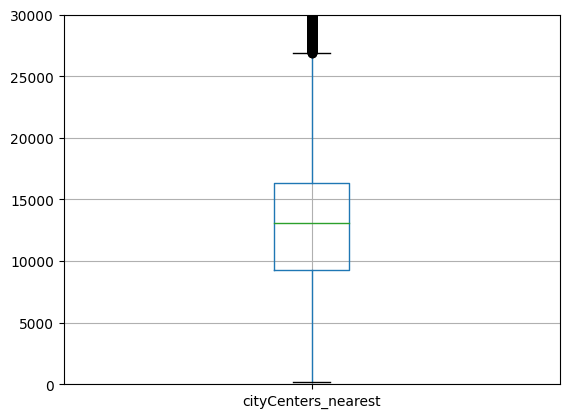

In [ ]:
data.boxplot(column=['cityCenters_nearest'])
plt.ylim(0,30000);

In [ ]:
range_cC_info=data.describe()
first_rcCq=range_cC_info.loc[range_cC_info.index=='25%','cityCenters_nearest'].reset_index()
third_rcCq=range_cC_info.loc[range_cC_info.index=='75%','cityCenters_nearest'].reset_index()
mustache_right=third_rcCq['cityCenters_nearest']+1.5*(third_rcCq['cityCenters_nearest']-first_rcCq['cityCenters_nearest'])
mustache_right=mustache_right.iloc[0]

Исправим слишком больше занчения на медиану

In [ ]:
data.loc[data['cityCenters_nearest']>=mustache_right,'cityCenters_nearest']=data['cityCenters_nearest'].median()
#data.loc[data['airports_nearest']==0,'airports_nearest']=data['airports_nearest'].median()
mustache_right

26875.5

2 вариант:
for x in data['cityCenters_nearest']:
  if x>=mustache_right:
    data['cityCenters_nearest']=data['cityCenters_nearest'].median()

In [ ]:
data.query('cityCenters_nearest>=27000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_status
row_number,,,,,,,,,,,,,,,,,,,,,


In [ ]:
data['cityCenters_nearest'].median()

13098.25

In [ ]:
data['cityCenters_nearest'].describe()

count    18180.000000
mean     12134.065979
std       4931.279964
min        181.000000
25%       9238.000000
50%      13098.250000
75%      15027.750000
max      26872.000000
Name: cityCenters_nearest, dtype: float64

In [ ]:
data['days_exposition'].value_counts().sort_index()

1.0         1
2.0         3
3.0       158
4.0       176
5.0       152
         ... 
1512.0      2
1513.0      1
1553.0      1
1572.0      1
1580.0      1
Name: days_exposition, Length: 1141, dtype: int64

In [ ]:
data['floor'].value_counts().sort_index()

1     2917
2     3368
3     3073
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
11     523
12     526
13     379
14     337
15     343
16     315
17     227
18     178
19     147
20     110
21     125
22     113
23     100
24      63
25      46
26      24
27      10
28       1
29       1
30       1
31       1
32       1
33       1
Name: floor, dtype: int64

In [ ]:
data['floors_total'].value_counts().sort_index()

1.0       25
2.0      383
3.0      668
4.0     1200
5.0     5788
6.0      914
7.0      592
8.0      390
9.0     3761
10.0    1174
11.0     203
12.0    1362
13.0     229
14.0     553
15.0     365
16.0    1376
17.0     833
18.0     505
19.0     339
20.0     271
21.0     158
22.0     286
23.0     352
24.0     469
25.0    1075
26.0     124
27.0     164
28.0      21
29.0       1
33.0       1
34.0       1
35.0      24
36.0       3
37.0       1
52.0       1
60.0       1
Name: floors_total, dtype: int64

In [ ]:
data.query('floors_total>35')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_status
row_number,,,,,,,,,,,,,,,,,,,,,
397,15,5990000.0,54.0,2018-03-22,2,NaN,36.0,21.4,28,True,...,1,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0,Ошибки нет.
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60.0,27.4,4,True,...,0,Кронштадт,67763.0,13098.5,2.0,342.0,3.0,614.0,166.0,Ошибки нет.
5807,17,8150000.0,80.0,2019-01-09,2,2.70,36.0,41.0,13,True,...,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0,Ошибки нет.
11079,16,9200000.0,75.0,2019-02-22,2,2.70,36.0,40.0,29,True,...,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN,Ошибки нет.
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52.0,10.5,18,True,...,0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0,Ошибки нет.
16934,5,4100000.0,40.0,2017-10-17,1,2.65,37.0,17.4,5,True,...,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0,Ошибка. Слишком низко.


In [ ]:
six=6
data.loc[data['floors_total']==60,'floors_total']=six
data.query('floors_total==60')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_status
row_number,,,,,,,,,,,,,,,,,,,,,


###Путем исследовния в яндекс картах я выяснил что данные по расстоянию от центра города завышены в 1,5 раза

In [ ]:
data['kitchen_area'].value_counts().sort_index()

1.30      1
2.00      7
2.30      1
2.40      1
2.89      1
         ..
93.20     1
100.00    1
100.70    1
107.00    1
112.00    1
Name: kitchen_area, Length: 971, dtype: int64

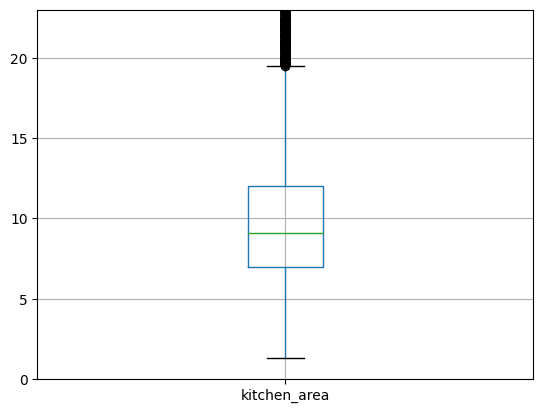

In [ ]:
data.boxplot(column='kitchen_area')
plt.ylim(0,23);

In [ ]:
data.query('kitchen_area>100')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_status
row_number,,,,,,,,,,,,,,,,,,,,,
2489,9,12500000.0,255.0,2017-04-21,3,NaN,2.0,153.9,2,True,...,0,Санкт-Петербург,29544.0,6916.0,0.0,NaN,3.0,198.0,102.0,Ошибки нет.
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25.0,409.7,25,True,...,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0,Ошибки нет.
20215,2,85000000.0,249.7,2018-02-01,3,NaN,10.0,72.0,9,True,...,4,Санкт-Петербург,31532.0,4624.0,1.0,2218.0,2.0,99.0,26.0,Ошибки нет.


In [ ]:
data['last_price'].value_counts().sort_index()

12190.0        1
430000.0       2
440000.0       1
450000.0       4
470000.0       3
              ..
300000000.0    1
330000000.0    1
401300000.0    1
420000000.0    1
763000000.0    1
Name: last_price, Length: 2978, dtype: int64

In [ ]:
new_cost=data.loc[data['last_price']<100000,'last_price']*1000
new_cost

row_number
8793    12190000.0
Name: last_price, dtype: float64

In [ ]:
data.loc[data['last_price']<100000,'last_price']=new_cost
data.query('last_price<100000');

<Axes: >

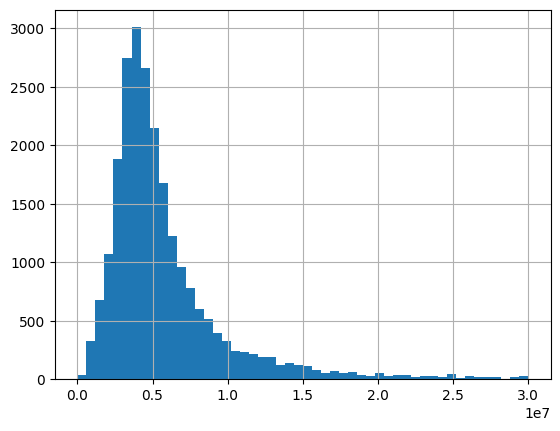

In [ ]:
data['last_price'].hist(bins=50,range=(0,30000000))

от нуля до 30 миллионов

In [ ]:
data['living_area'].value_counts().sort_index().head(20)

2.00      2
3.00      2
5.00      1
5.40      1
6.00      1
6.50      1
8.00      2
8.30      1
8.40      1
8.50      1
8.90      1
9.00      9
9.10      1
9.80      1
10.00    33
10.08     2
10.30     2
10.40     3
10.50     5
10.52     1
Name: living_area, dtype: int64

In [ ]:
data.query('living_area<8')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_status
row_number,,,,,,,,,,,,,,,,,,,,,
3242,7,4440000.0,41.0,2017-07-02,1,NaN,17.0,3.0,17,True,...,0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0,Ошибки нет.
13915,20,6350000.0,52.0,2018-02-06,2,3.0,6.0,2.0,2,True,...,0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0,Ошибки нет.
16431,13,3799000.0,31.0,2018-04-12,1,2.6,5.0,6.0,1,True,...,0,Санкт-Петербург,32177.0,4826.0,1.0,430.0,0.0,NaN,168.0,Ошибки нет.
17582,11,2680000.0,22.0,2018-08-11,0,NaN,25.0,5.0,8,True,...,2,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0,Ошибки нет.
19251,19,4050000.0,33.0,2018-10-15,1,2.5,22.0,6.5,21,True,...,0,Санкт-Петербург,9258.0,10592.0,1.0,458.0,0.0,NaN,44.0,Ошибки нет.
21758,0,2330000.0,23.0,2018-01-01,0,NaN,24.0,2.0,22,True,...,0,Мурино,NaN,NaN,0.0,NaN,0.0,NaN,66.0,Ошибки нет.
21943,15,6100000.0,77.6,2019-02-28,4,2.5,9.0,5.4,1,True,...,0,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0,Ошибки нет.
23574,14,64990000.0,139.0,2015-11-24,3,3.0,8.0,3.0,8,True,...,1,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0,Ошибки нет.


In [ ]:
data['living_area'].value_counts().sort_index().tail(20)

225.9    1
230.0    1
239.4    1
248.5    1
248.7    1
250.0    5
255.7    1
258.0    1
260.0    1
264.5    1
274.0    1
279.6    1
300.0    1
301.5    1
312.5    1
322.3    1
332.0    1
347.5    1
409.0    1
409.7    1
Name: living_area, dtype: int64

In [ ]:
data.query('living_area>=total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_status
row_number,,,,,,,,,,,,,,,,,,,,,
9861,10,2350000.0,25.0,2017-12-03,0,NaN,22.0,25.0,17,True,...,2,Мурино,NaN,NaN,0.0,NaN,0.0,NaN,13.0,Ошибки нет.
12691,1,3700000.0,24.2,2017-11-10,0,NaN,19.0,24.2,13,True,...,1,Санкт-Петербург,17837.0,16840.0,0.0,NaN,2.0,210.0,74.0,Ошибки нет.


Нет ошибок данных в том что жилая площадь может быть больше общей.

In [ ]:
data[['last_price','total_area','living_area','kitchen_area','rooms','studio','locality_name']].query('living_area<10').sort_values(by='total_area')

,last_price,total_area,living_area,kitchen_area,rooms,studio,locality_name
row_number,,,,,,,
4542,3300000.0,18.00,9.0,NaN,1,False,Санкт-Петербург
114,4000000.0,21.40,8.3,6.3,1,False,Санкт-Петербург
17582,2680000.0,22.00,5.0,NaN,0,True,Санкт-Петербург
21758,2330000.0,23.00,2.0,NaN,0,True,Мурино
7312,3400000.0,27.00,9.0,16.0,2,False,Санкт-Петербург
16431,3799000.0,31.00,6.0,17.0,1,False,Санкт-Петербург
19620,4300000.0,33.00,9.0,17.0,1,False,Санкт-Петербург
19251,4050000.0,33.00,6.5,18.0,1,False,Санкт-Петербург
15833,4600000.0,33.00,9.0,14.3,1,False,Санкт-Петербург


In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,23699.000000,8079.000000,23699.000000,9110.000000,20518.000000
mean,9.858475,6.542063e+06,60.348651,2.070636,2.727197,10.671537,34.457852,5.892358,10.569807,0.591080,28795.144132,12134.065979,0.469049,490.804555,0.590911,517.980900,180.888634
std,5.682529,1.088699e+07,35.654083,1.078405,0.277750,6.589428,22.030445,4.885249,5.905438,0.959298,12629.082097,4931.279964,0.748534,342.317995,0.883999,277.720643,219.727988
min,0.000000,4.300000e+05,12.000000,0.000000,2.300000,1.000000,2.000000,1.000000,1.300000,0.000000,6450.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.250000,0.000000,455.000000,0.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,15027.750000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,6.000000,52.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,26872.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [ ]:
living_area_info=data.describe()
first_lq=living_area_info.loc[living_area_info.index=='25%','living_area'].reset_index()
third_lq=living_area_info.loc[living_area_info.index=='75%','living_area'].reset_index()
first_lq['living_area']-1.5*(third_lq['living_area']-first_lq['living_area'])

0   -16.95
Name: living_area, dtype: float64

так как данные по жилой площади попадают в усы, то не думаю что есть целесообразность исключать или менять их

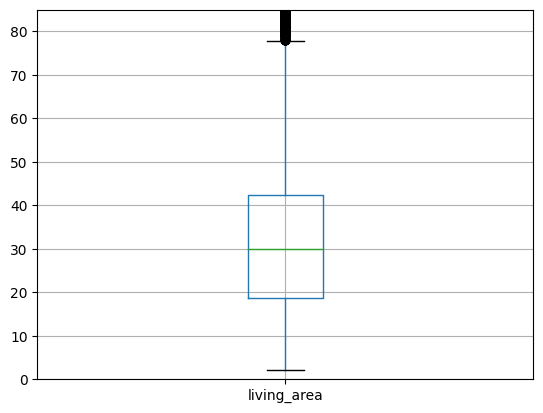

In [ ]:
data.boxplot(column=['living_area'])
plt.ylim(0,85);

Значения жилой площади по сравнению общей площади в тех же квартрах в некотоых случаях вызывает подозрения - при использовании метода ящика с усами нельзя слишком маленькте значения признать выбросами

In [ ]:
data['parks_around3000'].value_counts().sort_index().head(20)

0.0    15624
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

In [ ]:
data['parks_nearest'].value_counts().sort_index()

1.0       1
3.0       1
4.0       1
7.0       1
9.0       2
         ..
2905.0    1
2984.0    1
3013.0    1
3064.0    1
3190.0    2
Name: parks_nearest, Length: 995, dtype: int64

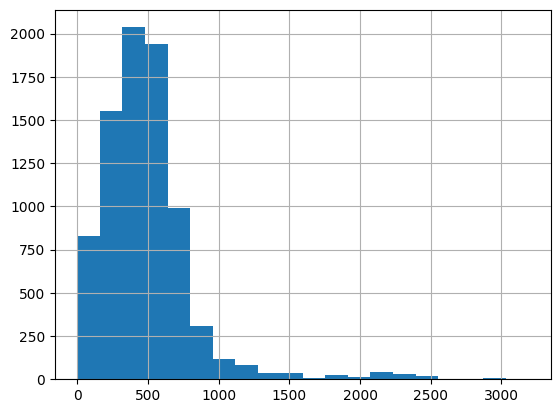

In [ ]:
data['parks_nearest'].hist(bins=20);

In [ ]:
parks_info=data.describe()
mean_q=parks_info.loc[parks_info.index=='50%','parks_nearest'].reset_index()
first_q=parks_info.loc[parks_info.index=='25%','parks_nearest'].reset_index()
third_q=parks_info.loc[parks_info.index=='75%','parks_nearest'].reset_index()
first_q['parks_nearest']-1.5*(third_q['parks_nearest']-first_q['parks_nearest'])


0   -198.0
Name: parks_nearest, dtype: float64

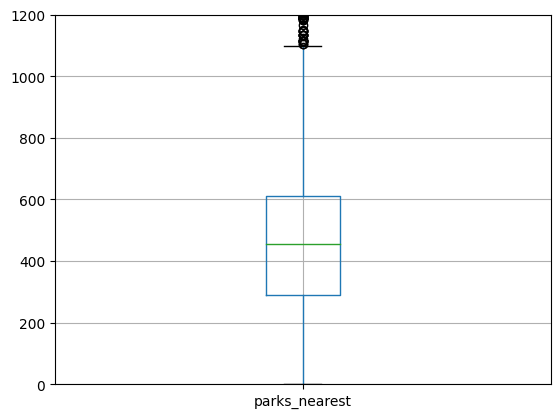

In [ ]:
data.boxplot(column=['parks_nearest']);
plt.ylim(0,1200);


Значения расстояния до ближайшего парка который меньше 10 метров кажутся выбросами, но анализ по ящику с усами показал что нет

In [ ]:
data['ponds_around3000'].value_counts().sort_index().head(20)

0.0    14589
1.0     5717
2.0     1892
3.0     1501
Name: ponds_around3000, dtype: int64

In [ ]:
data['ponds_nearest'].value_counts().sort_index().head(20)

13.0     2
16.0     8
19.0     4
20.0     5
22.0     7
23.0     1
24.0     7
25.0     1
26.0     3
27.0     3
29.0     8
30.0     2
31.0    23
32.0     3
33.0     4
34.0     1
35.0    10
36.0     3
37.0     1
38.0     7
Name: ponds_nearest, dtype: int64

In [ ]:
ponds_info=data.describe()
mean_ponds_q=ponds_info.loc[ponds_info.index=='50%','ponds_nearest'].reset_index()
first_pond_q=ponds_info.loc[ponds_info.index=='25%','ponds_nearest'].reset_index()
third_ponds_q=ponds_info.loc[ponds_info.index=='75%','ponds_nearest'].reset_index()
first_pond_q['ponds_nearest']-1.5*(third_ponds_q['ponds_nearest']-first_pond_q['ponds_nearest'])

0   -358.5
Name: ponds_nearest, dtype: float64

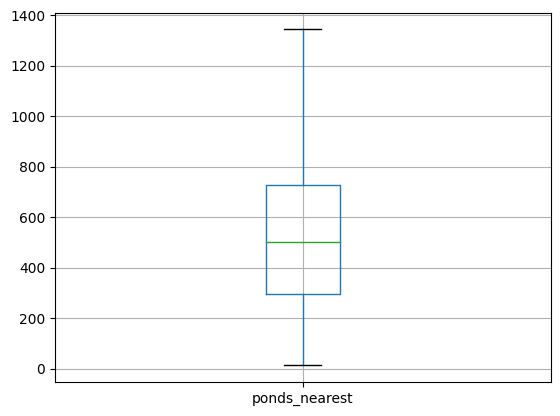

In [ ]:
data.boxplot(column=['ponds_nearest']);

Маленькте начения расстояния до ближайшего водоема кажутся выбросами, но анализ по ящику с усами показал что нет

In [ ]:
data['rooms'].value_counts().sort_index().head(20)

0      197
1     8047
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

In [ ]:
data.query('rooms>10').sort_values(by='rooms').head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_status
row_number,,,,,,,,,,,,,,,,,,,,,
648,3,17500000.0,183.7,2018-07-01,11,3.40,7.0,138.8,7,True,...,0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN,Ошибки нет.
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5.0,129.0,2,True,...,0,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0,Ошибки нет.
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,True,...,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0,Ошибки нет.
866,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,True,...,0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0,Ошибки нет.
20829,6,28659000.0,245.4,2016-03-31,14,NaN,4.0,168.3,2,True,...,0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0,Ошибки нет.
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,True,...,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0,Ошибки нет.
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4.0,180.0,4,True,...,1,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0,Ошибки нет.
14498,6,32250000.0,374.6,2018-06-09,19,NaN,5.0,264.5,2,True,...,0,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0,Ошибки нет.


In [ ]:
data['total_area'].value_counts().sort_index().head(20)

12.00    1
13.00    3
13.20    1
14.00    1
15.00    2
15.50    1
16.00    1
17.00    2
17.20    1
17.60    1
17.78    1
18.00    5
18.40    1
18.50    1
18.80    1
18.90    1
19.00    2
19.50    1
20.00    8
20.10    1
Name: total_area, dtype: int64

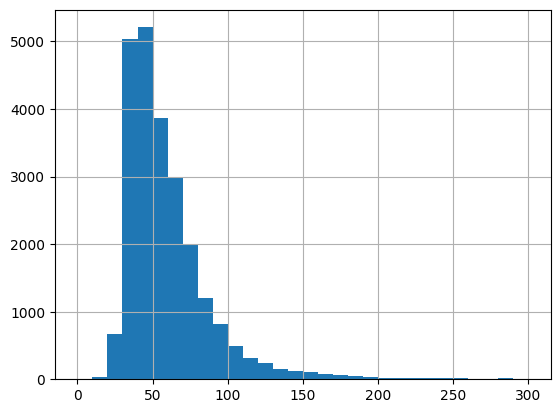

In [ ]:
data['total_area'].hist(bins=30,range=(0,300));

In [ ]:
data['total_images'].value_counts().sort_index()

0     1059
1      872
2      640
3      769
4      986
5     1301
6     1482
7     1521
8     1585
9     1725
10    1798
11    1362
12    1225
13    1015
14     986
15     948
16     761
17     650
18     642
19     603
20    1694
21      12
22       8
23      16
24       8
25       1
26       5
27       2
28       4
29       3
30       2
31       2
32       4
35       2
37       1
39       1
42       1
50       3
Name: total_images, dtype: int64

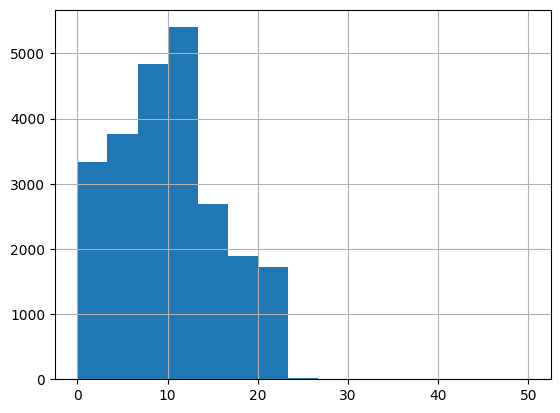

In [ ]:
data['total_images'].hist(bins=15,range=(0,50));

In [ ]:
data[data['living_area'] < 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_status
row_number,,,,,,,,,,,,,,,,,,,,,
114,5,4000000.0,21.40,2019-02-07,1,2.90,8.0,8.3,7,True,...,0,Санкт-Петербург,27089.0,5791.0,2.0,488.0,1.0,286.0,NaN,Ошибки нет.
680,14,7200000.0,43.00,2017-10-31,1,NaN,8.0,9.0,2,True,...,0,Санкт-Петербург,23900.0,5232.0,1.0,2137.0,1.0,933.0,296.0,Ошибки нет.
1326,8,8100000.0,52.00,2017-01-29,2,2.70,25.0,9.0,15,True,...,2,Санкт-Петербург,35555.0,15561.0,0.0,NaN,1.0,1180.0,337.0,Ошибки нет.
2309,10,4200000.0,62.40,2017-06-15,2,2.60,9.0,8.4,6,True,...,2,Шушары,23662.0,13098.5,0.0,NaN,0.0,NaN,111.0,Ошибки нет.
3242,7,4440000.0,41.00,2017-07-02,1,NaN,17.0,3.0,17,True,...,0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0,Ошибки нет.
4100,17,5300000.0,34.80,2017-06-19,1,2.70,23.0,9.0,15,True,...,0,Санкт-Петербург,33626.0,13495.0,0.0,NaN,0.0,NaN,30.0,Ошибки нет.
4542,12,3300000.0,18.00,2018-11-07,1,3.50,5.0,9.0,2,True,...,0,Санкт-Петербург,25157.0,4948.0,2.0,349.0,1.0,963.0,9.0,Ошибки нет.
7312,8,3400000.0,27.00,2018-02-21,2,2.50,15.0,9.0,4,True,...,0,Санкт-Петербург,50246.0,16444.0,1.0,617.0,0.0,NaN,NaN,Ошибки нет.
8325,9,4800000.0,52.00,2017-10-25,2,NaN,5.0,9.0,2,True,...,1,Санкт-Петербург,33358.0,13171.0,0.0,NaN,2.0,118.0,119.0,Ошибки нет.


In [ ]:
len(data[data['living_area'] < 10])

25

In [ ]:
data = data[data['living_area'] >= 10]

In [ ]:
len(data[data['living_area'] < 10])

0

Убрал аномально низкие значения

In [ ]:
data['rooms'].value_counts().sort_index().head(20)

0      181
1     7374
2     7289
3     5365
4     1088
5      292
6       99
7       53
8       12
9        7
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

In [ ]:
len(data)

21771

In [ ]:
data.loc[data['studio']==True,'rooms'].unique()

array([0, 1])

In [ ]:
print('Количество строк не студий с 0 комнатами:',len(data.loc[((data['studio']==False) & (data['rooms']==0))]))

Количество строк не студий с 0 комнатами: 55


In [ ]:
print('Количество остальных строк:',len(data.loc[((data['studio']==True) | (data['rooms']!=0))]))

Количество остальных строк: 21716


In [ ]:
data=data.loc[((data['studio']==True) | (data['rooms']!=0))]
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_status
row_number,,,,,,,,,,,,,,,,,,,,,
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,True,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Ошибки нет.
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,True,...,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Ошибки нет.
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,True,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Ошибки нет.
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,True,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Ошибки нет.
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.4,5,True,...,0,Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,Ошибки нет.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.0,8,True,...,0,Петергоф,45602.0,13098.5,1.0,352.0,1.0,675.0,239.0,Ошибки нет.
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,True,...,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,Ошибки нет.
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,True,...,0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0,Ошибки нет.


In [ ]:
rooms_info=data.describe()
mean_q_rooms=rooms_info.loc[rooms_info.index=='50%','rooms'].reset_index()
first_q_rooms=rooms_info.loc[rooms_info.index=='25%','rooms'].reset_index()
third_q_rooms=rooms_info.loc[rooms_info.index=='75%','rooms'].reset_index()
left_mustache_rooms=first_q_rooms['rooms']-1.5*(third_q_rooms['rooms']-first_q_rooms['rooms'])
rihgt_mustache_rooms=third_q_rooms['rooms'] + 1.5*(third_q_rooms['rooms'] - first_q_rooms['rooms'])
print('Левый ус=',left_mustache_rooms.iloc[0])
print('Правый ус=',rihgt_mustache_rooms.iloc[0])

Левый ус= -2.0
Правый ус= 6.0


##Сначала удалил эти строки но потом решил оставить так как это не аномалии
rooms_info=data.describe()
mean_q_rooms=rooms_info.loc[rooms_info.index=='50%','rooms'].reset_index()
first_q_rooms=rooms_info.loc[rooms_info.index=='25%','rooms'].reset_index()
third_q_rooms=rooms_info.loc[rooms_info.index=='75%','rooms'].reset_index()
left_mustache_rooms=first_q_rooms['rooms']-1.5*(third_q_rooms['rooms']-first_q_rooms['rooms'])
rihgt_mustache_rooms=third_q_rooms['rooms']+1.5*(third_q_rooms['rooms']-first_q_rooms['rooms'])
print('Левый ус=',left_mustache_rooms.iloc[0])
print('Правый ус=',rihgt_mustache_rooms.iloc[0])

(0.0, 10.0)

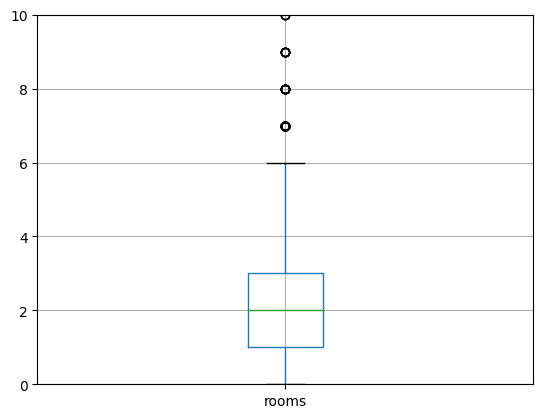

In [ ]:
data.boxplot(column=['rooms'])
plt.ylim(0,10)

Уберем значения больше 8 комант как выбросы - потому что число строк становится однозначным

In [ ]:
data=data.query('rooms<=8')

In [ ]:
data['rooms'].value_counts().sort_index().head(20)

0     126
1    7374
2    7289
3    5365
4    1088
5     292
6      99
7      53
8      12
Name: rooms, dtype: int64

In [ ]:
price_info=data.describe()
mean_q_price=price_info.loc[price_info.index=='50%','last_price'].reset_index()
first_q_price=price_info.loc[price_info.index=='25%','last_price'].reset_index()
third_q_price=price_info.loc[price_info.index=='75%','last_price'].reset_index()
left_mustache_price=first_q_price['last_price']-1.5*(third_q_price['last_price']-first_q_price['last_price'])
rihgt_mustache_price=third_q_price['last_price']+1.5*(third_q_price['last_price']-first_q_price['last_price'])
print('Левый ус=',left_mustache_price.iloc[0])
print('Правый ус=',rihgt_mustache_price.iloc[0])

Левый ус= -1500000.0
Правый ус= 11700000.0


price_info=data.describe()
mean_q_price=price_info.loc[price_info.index=='50%','last_price'].reset_index()
first_q_price=price_info.loc[price_info.index=='25%','last_price'].reset_index()
third_q_price=price_info.loc[price_info.index=='75%','last_price'].reset_index()
left_mustache_price=first_q_price['last_price']-1.5*(third_q_price['last_price']-first_q_price['last_price'])
rihgt_mustache_price=third_q_price['last_price']+1.5*(third_q_price['last_price']-first_q_price['last_price'])
print('Левый ус=',left_mustache_price.iloc[0])
print('Правый ус=',rihgt_mustache_price.iloc[0])

(0.0, 12000000.0)

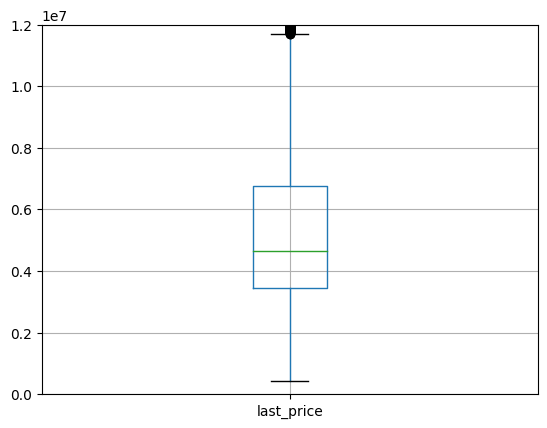

In [ ]:
data.boxplot(column=['last_price'])
plt.ylim(0,12000000)

###Решил не убирать так как это не выбросы
Уберем строки с ценой больше 11 575 000 рублей как выбросы - (((не могу ----превышение колличества выбросов)))

In [ ]:
rihgt_mustache_price.iloc[0]

11700000.0

In [ ]:
data=data.query('last_price<=@rihgt_mustache_price.iloc[0]')

In [ ]:
data.query('last_price>@rihgt_mustache_price.iloc[0]')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_status
row_number,,,,,,,,,,,,,,,,,,,,,


In [ ]:
data = data[data['last_price'] > 100000]
data[data['last_price']< 100000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_status
row_number,,,,,,,,,,,,,,,,,,,,,


<Axes: >

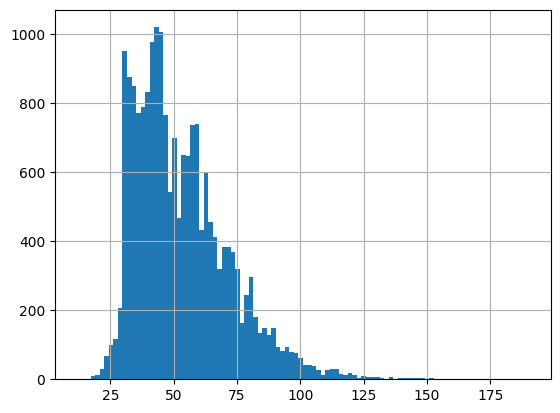

In [ ]:
data['total_area'].hist(bins=100)

In [ ]:
q_info=data.describe()
mean_q_area=q_info.loc[price_info.index=='50%','total_area'].reset_index()
first_q_area=q_info.loc[q_info.index=='25%','total_area'].reset_index()
third_q_area=q_info.loc[q_info.index=='75%','total_area'].reset_index()
left_mustache_area=first_q_area['total_area']-1.5*(third_q_area['total_area']-first_q_area['total_area'])
right_mustache_area=third_q_area['total_area']+1.5*(third_q_area['total_area']-first_q_area['total_area'])
print('Левый ус=',left_mustache_area.iloc[0])
print('Правый ус=',right_mustache_area.iloc[0])

Левый ус= 2.0999999999999943
Правый ус= 100.5


In [ ]:
len(data.query('total_area>@right_mustache_area.iloc[0]'))

399

In [ ]:
data=data.query('total_area<=@right_mustache_area.iloc[0]')

In [ ]:
data.query('total_area>@right_mustache_area.iloc[0]')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_status
row_number,,,,,,,,,,,,,,,,,,,,,


In [ ]:
new_data=data
new_data.shape[0]/old_data.shape[0]

0.8201611882357905

In [ ]:
print(f'Процент отрбасываемых данных равен {round((1-new_data.shape[0]/old_data.shape[0])*100,2)} %')

Процент отрбасываемых данных равен 17.98 %


ВЫВОД: Есть дома с очень большой площадью. Есть квартиры где кухня занимает всю площадь. Так же есть ошибки в данных, например в высоте потолка и указанной цене. Так же кто-то жил в аэропорту но мы это исправили. Очень странные данные по расстояню до центра города - при срезе данных по этажам больше 35 выпадает не очень много строк где есть 37 этажное здание, что соответствует Лахта-центру и ЖК"Князь Александр Невский", мой анализ использования Яндекс карт выявил что расстояние в данных завышено в 1,5 раза (Гипотеза). Есть странность с маленькой жилой площадью. C помощью ящика с усами не получается избавится от подозрительных нижних значений. Интерес вызывали квартиры(?) с большим количеством комнат, но глядя на площадь все встает на свои места.

На основании метода ящика с усами были убраны строчки датафрейма data, которые превышали кончики усов. У колличества комнат было выбрано число 8, так как после него количество уникальных значений по каждому количеству комант было не велико (меньше 10 для каждый комнаты). Далее данные по последним ценам и общей площади были не категориальными, а скорее непрерывными - поэтому был выбран срез по правому (большей) строне усов. А именно 11 700 000 рублей для цен и 100 метров для общей площади.

## Шаг 3. Посчитайте и добавьте в таблицу новые столбцы

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19437 entries, 1 to 23698
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           19437 non-null  int64         
 1   last_price             19437 non-null  float64       
 2   total_area             19437 non-null  float64       
 3   first_day_exposition   19437 non-null  datetime64[ns]
 4   rooms                  19437 non-null  int64         
 5   ceiling_height         12084 non-null  float64       
 6   floors_total           19394 non-null  float64       
 7   living_area            19437 non-null  float64       
 8   floor                  19437 non-null  int64         
 9   is_apartment           19437 non-null  bool          
 10  studio                 19437 non-null  bool          
 11  open_plan              19437 non-null  bool          
 12  kitchen_area           18750 non-null  float64       
 13  b

In [ ]:
data['price_per_square_meter']=data['last_price']/data['total_area']
data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['km_cityCenters_nearest_km']=round(data['cityCenters_nearest']/1000)
warnings.filterwarnings("ignore")
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_status,price_per_square_meter,weekday,month,year,km_cityCenters_nearest_km
row_number,,,,,,,,,,,,,,,,,,,,,
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,True,...,NaN,0.0,NaN,81.0,Ошибки нет.,82920.792079,1,12,2018,19.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,True,...,90.0,2.0,574.0,558.0,Ошибки нет.,92785.714286,3,8,2015,14.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,True,...,112.0,1.0,48.0,121.0,Ошибки нет.,100000.000000,1,6,2018,8.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,True,...,NaN,0.0,NaN,55.0,Ошибки нет.,95065.789474,0,9,2018,NaN
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,True,...,NaN,0.0,NaN,155.0,Ошибки нет.,99195.710456,3,11,2017,19.0
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,True,...,NaN,0.0,NaN,189.0,Ошибки нет.,87454.764777,2,5,2018,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,True,...,NaN,0.0,NaN,289.0,Ошибки нет.,88524.590164,6,2,2017,15.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.30,3,True,...,310.0,2.0,553.0,137.0,Ошибки нет.,127525.252525,3,11,2017,14.0
11,9,3300000.0,44.00,2018-08-27,2,NaN,5.0,31.00,4,False,...,NaN,0.0,NaN,7.0,Ошибки нет.,75000.000000,0,8,2018,13.0


In [ ]:
def floors(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'ошибка'

data['floors_category'] = data.apply(floors,axis=1)

In [ ]:
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_status,price_per_square_meter,weekday,month,year,km_cityCenters_nearest_km,floors_category
row_number,,,,,,,,,,,,,,,,,,,,,
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,True,...,0.0,NaN,81.0,Ошибки нет.,82920.792079,1,12,2018,19.0,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,True,...,2.0,574.0,558.0,Ошибки нет.,92785.714286,3,8,2015,14.0,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,1.0,48.0,121.0,Ошибки нет.,100000.000000,1,6,2018,8.0,другой
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,True,...,0.0,NaN,55.0,Ошибки нет.,95065.789474,0,9,2018,NaN,другой
6,6,3700000.0,37.3,2017-11-02,1,NaN,26.0,10.6,6,True,...,0.0,NaN,155.0,Ошибки нет.,99195.710456,3,11,2017,19.0,другой


Задания в шаге 3 выполнены - вопросов нет (выводов тоже)).

### Шаг 4. Проведите исследовательский анализ данных

<Axes: >

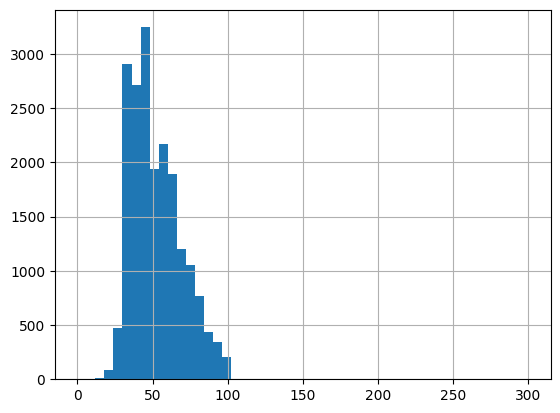

In [ ]:
data['total_area'].hist(bins=50,range=(0,300))

На вид как распределение Пауссона

<Axes: >

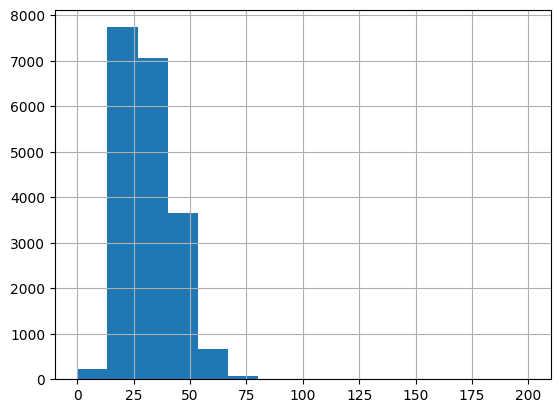

In [ ]:
data['living_area'].hist(bins=15,range=(0,200))

На вид как распределение Пауссона

<Axes: >

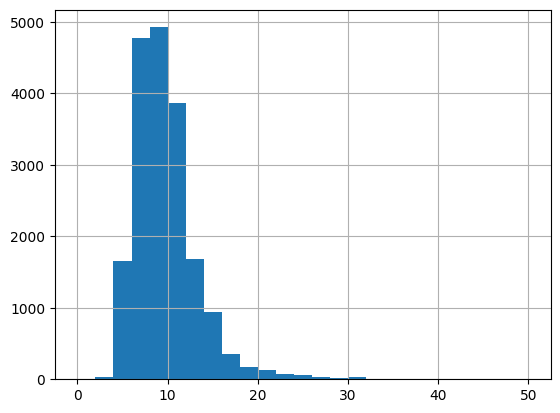

In [ ]:
data['kitchen_area'].hist(bins=25,range=(0,50))

На вид как распределение Пауссона

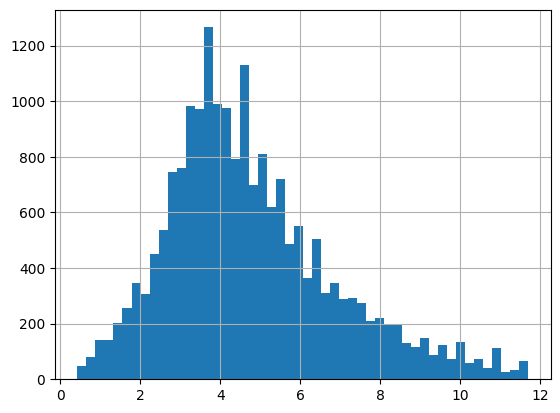

In [ ]:
(data['last_price']/1000000).hist(bins=50);

На вид как распределение Пауссона

,rooms_count
rooms,
0,125
1,7341
2,6967
3,4434
4,540
5,28
6,2


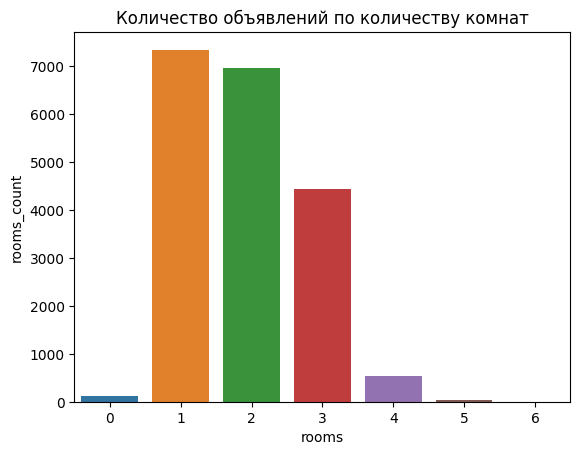

In [ ]:
rooms_count=pd.DataFrame(data.groupby('rooms')['rooms'].count())
rooms_count.columns=['rooms_count']
display(rooms_count)
sb.barplot(x=rooms_count.index,y=rooms_count['rooms_count'])
plt.title('Количество объявлений по количеству комнат');

На вид как распределение Пауссона

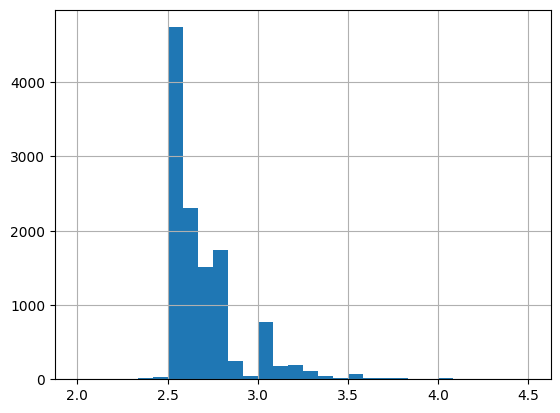

In [ ]:
data['ceiling_height'].hist(bins=30,range=(2,4.5));

На вид как распределение Пауссона - оно немного изменено из-за замены ошибок и выбросов на медианную высоту

<Axes: >

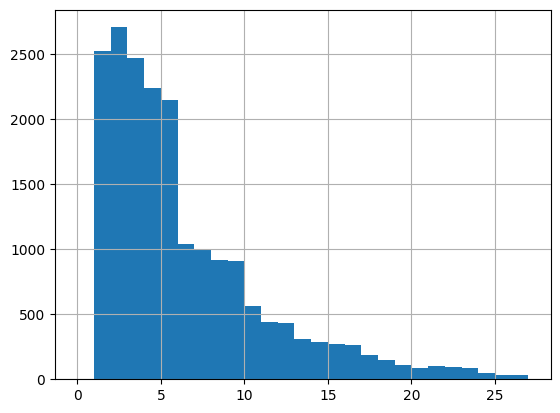

In [ ]:
data['floor'].hist(bins=27,range=(0,27))

На вид как распределение Пауссона

,floors_category_count
floors_category,
другой,14230
первый,2518
последний,2689


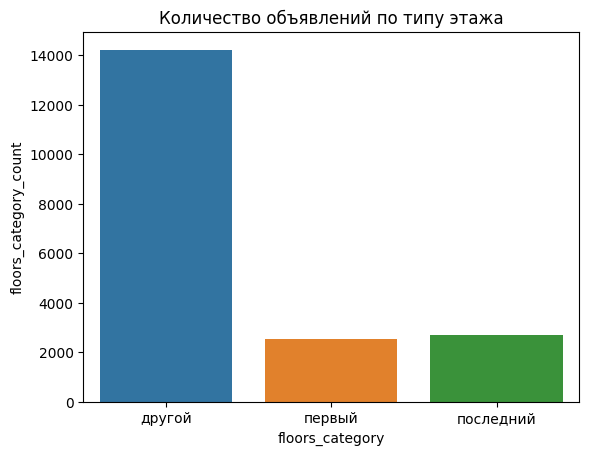

In [ ]:
floors_category_count=pd.DataFrame(data.groupby('floors_category')['floors_category'].count())
floors_category_count.columns=['floors_category_count']
display(floors_category_count)
sb.barplot(x=floors_category_count.index,y=floors_category_count['floors_category_count'])
plt.title('Количество объявлений по типу этажа');

Логично видно что другой этаж лидирует - при этом есть положительная корреляция между колличеством этажей и количесвтом строк с типом "другой".

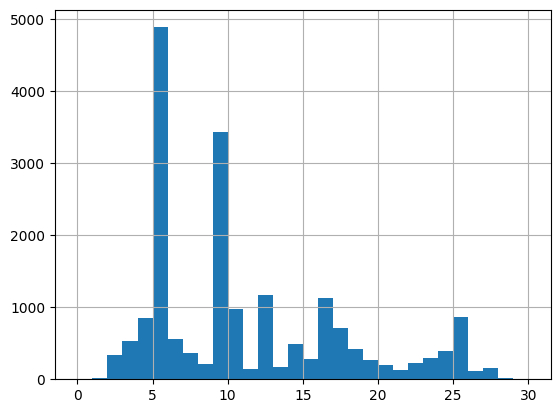

In [ ]:
data['floors_total'].hist(bins=30,range=(0,30));

Сложно сделать вывод о типе распределения - можно сослаться лишь на градостроительную политику нашей страны за послднение лет 70. Видно как эпохи сменяют друг друга.

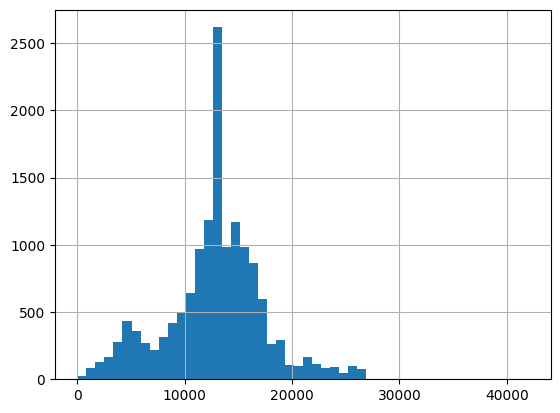

In [ ]:
data['cityCenters_nearest'].hist(bins=50,range=(0,42000));

От Мурино до Пулково как раз 30 км

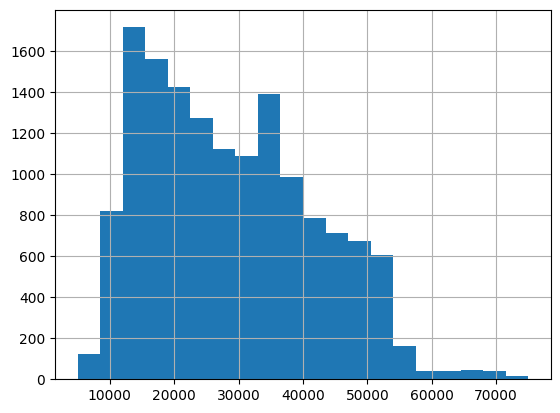

In [ ]:
data['airports_nearest'].hist(bins=20,range=(5000,75000));

На вид как нормальное распределение

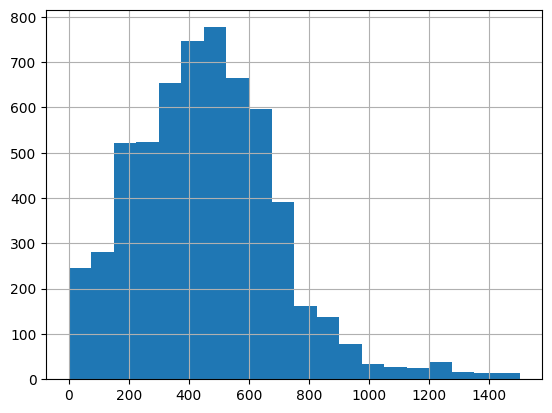

In [ ]:
data['parks_nearest'].hist(bins=20,range=(0,1500));

На вид как распределение Пауссона и нормальное

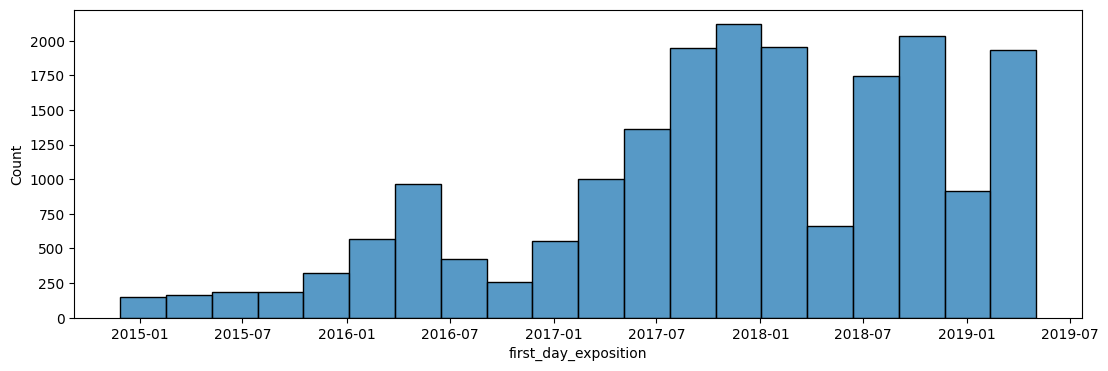

In [ ]:
ax=plt.figure(figsize=(13,4))
ax=sb.histplot(data['first_day_exposition'],bins=20)

По графику можно понять когда людям нужно было продавать квартиры чаще всего. Это можно объяснить экономической ситуации на рынке и деятельность девелоперов.

<br>Изучим день и месяц отдельно. Мы как раз создали столбцы для них в предыдущем шаге.
</div>

,weekday_count
weekday,
0,2991
1,3468
2,3230
3,3502
4,3307
5,1565
6,1374


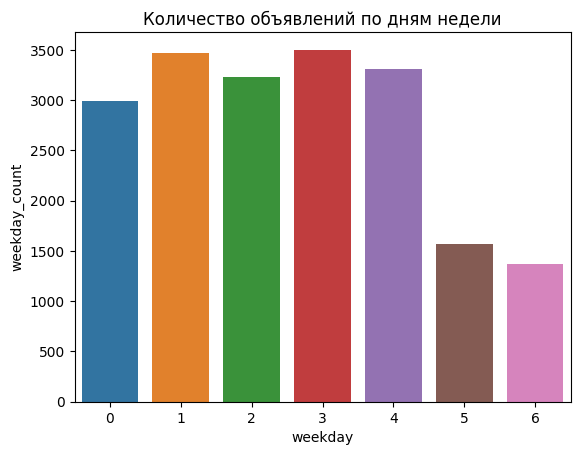

In [ ]:
weekday_count=pd.DataFrame(data.groupby('weekday')['weekday'].count())
weekday_count.columns=['weekday_count']
display(weekday_count)
sb.barplot(x=weekday_count.index,y=weekday_count['weekday_count'])
plt.title('Количество объявлений по дням недели');

В будние публикуется больше объявлений чем в выходные

,month_count
month,
1,1178
2,2115
3,2108
4,1992
5,1067
6,1457
7,1378
8,1456
9,1656


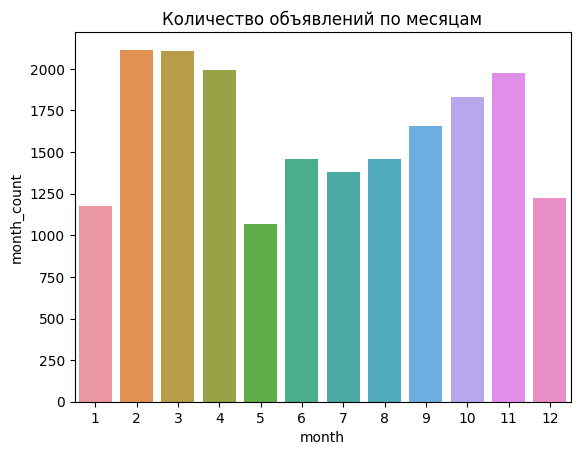

In [ ]:
month_count=pd.DataFrame(data.groupby('month')['month'].count())
month_count.columns=['month_count']
display(month_count)
sb.barplot(x=month_count.index,y=month_count['month_count'])
plt.title('Количество объявлений по месяцам');

Ближе к зиме и в зимнии месяцы кажого года видно оживление рынка вторичной недвижимости

,year_count
year,
2014,81
2015,917
2016,2342
2017,6810
2018,6869
2019,2418


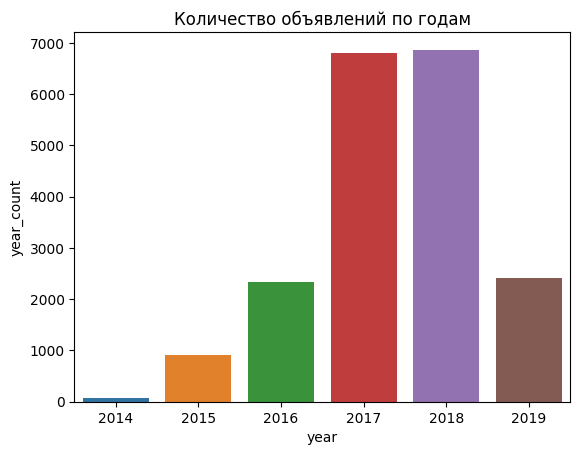

In [ ]:
year_count=pd.DataFrame(data.groupby('year')['year'].count())
year_count.columns=['year_count']
display(year_count)
sb.barplot(x=year_count.index,y=year_count['year_count'])
plt.title('Количество объявлений по годам');

Похоже на нормальное распределение - хотя это скорее совпадение - или факт того что изменения на рынке происходят в несколько лет - тут тенденция которой может быть лет 10 сменяет другую (фактор который вляил на рост ослабился и вырос фактор который влияет на падение или их действие по одному).

Наблюдается восходящий тренд который может говорить о увеличений колличетва квартир на рынке - о массовой застройке в какой-то промежуток времени, но в 2018 видимо произошло перенасыщение рынка - предложение превысило спрос и что может говорить о смещении цены к равновесной в 2019 - среднеквартирная цена упала - и о дальнейшем замедлении роста строительства

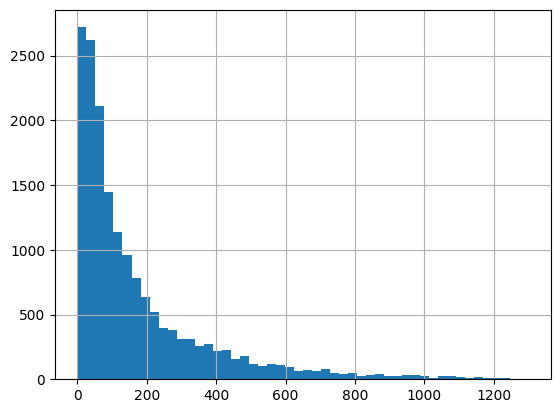

In [ ]:
data['days_exposition'].hist(bins=50,range=(0,1300));

На вид как распределение Пауссона

In [ ]:
data['days_exposition'].mean()
data['days_exposition'].describe()

count    17020.000000
mean       175.380435
std        211.230014
min          1.000000
25%         42.000000
50%         95.500000
75%        225.000000
max       1580.000000
Name: days_exposition, dtype: float64

mean       180.888634

In [ ]:
data['days_exposition'].median()

95.5

In [ ]:
days_info=data.describe()
first_days_q=days_info.loc[days_info.index=='25%','days_exposition'].reset_index()
third_days_q=days_info.loc[days_info.index=='75%','days_exposition'].reset_index()
first_days_q['days_exposition']-1.5*(third_days_q['days_exposition']-first_days_q['days_exposition'])


0   -232.5
Name: days_exposition, dtype: float64

In [ ]:
third_days_q['days_exposition']+1.5*(third_days_q['days_exposition']-first_days_q['days_exposition'])

0    499.5
Name: days_exposition, dtype: float64

нижния граница ящика с усами уходит ниже значений минимум а значит не несут смысла,
а вот верхняя = 512,5 - все что больше 512 дней, то есть все что почти больше 1,5 лет - можно считать необычно долгими

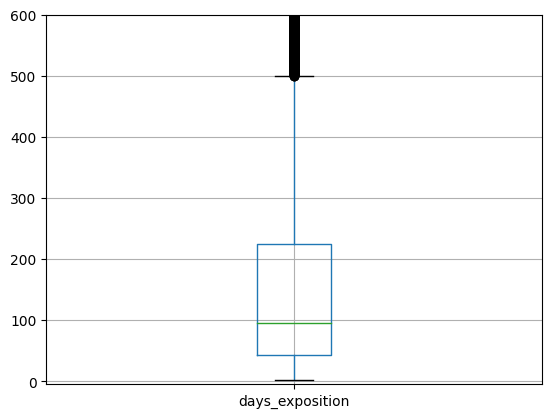

In [ ]:
data.boxplot(column=['days_exposition'])
plt.ylim(-5,600);

Обычно продажа 95 дней, судя по выборки продажи до 220 дней можно считать нормой, продажи после 250 дней можно назвать долгими. Быстрыми же продажами можно назвать продажи, сделка по которым прошла до 45 дней с момента публикации.

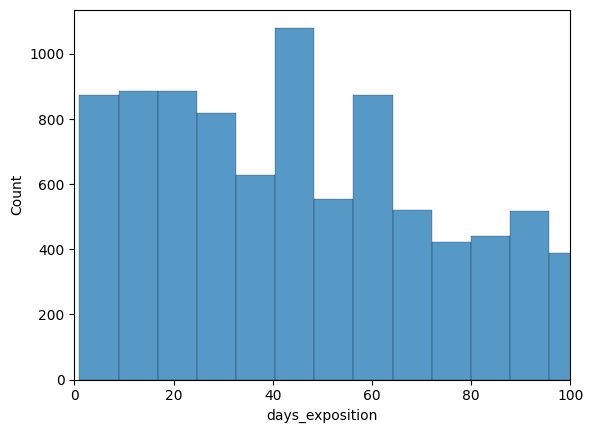

In [ ]:
sb.histplot(data['days_exposition'],bins=200)
plt.xlim(0,100);

Есть пик дней после которй идет продажа 45 дней, а до этого пика просадка по продажам.

<br>Рассчитывать корреляцию Пирсона для дня, месяца и года продажи не эффективно, так как цена в данном случае зависит от них не линейно, однако все равно оставим ее здесь. Чтобы изучить зависимость для этих параметров лучше построить bar plot или гистограмму рассчитав среднее значение или медиану.
</div>

In [ ]:
round(pd.DataFrame(data.corr()['total_images']),3)

,total_images
total_images,1.000
last_price,0.166
total_area,0.109
rooms,0.081
ceiling_height,0.009
floors_total,0.012
living_area,0.092
floor,0.031
is_apartment,0.035
studio,-0.030


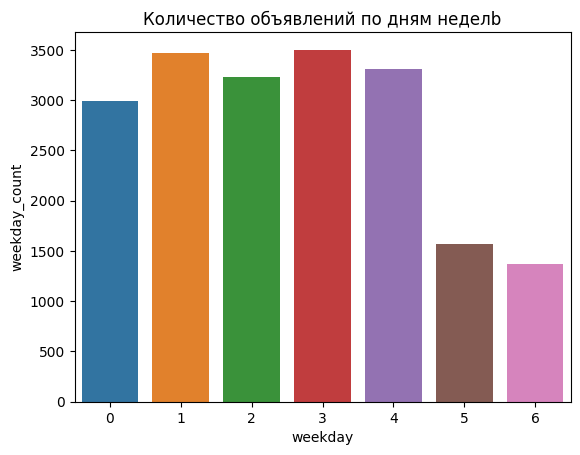

In [ ]:
sb.barplot(x=weekday_count.index,y=weekday_count['weekday_count'])
plt.title('Количество объявлений по дням неделb');

In [ ]:
round(pd.DataFrame(data['weekday'].describe()),2)

,weekday
count,19437.00
mean,2.56
std,1.79
min,0.00
25%,1.00
50%,3.00
75%,4.00
max,6.00


Как видно медианной является четверг

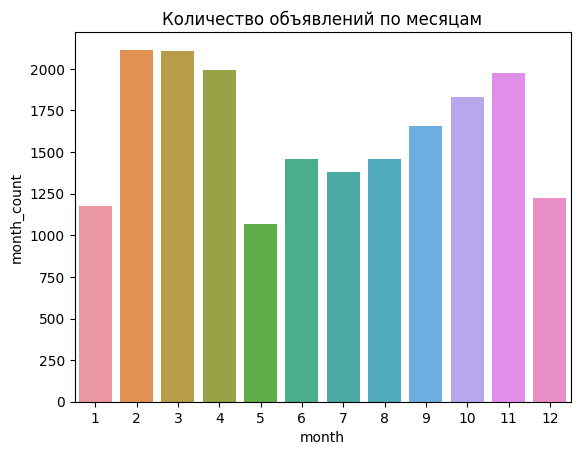

In [ ]:
sb.barplot(x=month_count.index,y=month_count['month_count'])
plt.title('Количество объявлений по месяцам');

In [ ]:
round(pd.DataFrame(data['month'].describe()))

,month
count,19437.0
mean,6.0
std,3.0
min,1.0
25%,3.0
50%,6.0
75%,10.0
max,12.0


Как видно медианной времени выставления является июль

In [ ]:
print(f'Однако медиана в ненормальных распределениях не даст ответа, рассмотри моду. Мода равна {data["month"].mode().item()}. Значит {data["month"].mode().item()} месяц будет самым популярным.')

Однако медиана в ненормальных распределениях не даст ответа, рассмотри моду. Мода равна 2. Значит 2 месяц будет самым популярным.


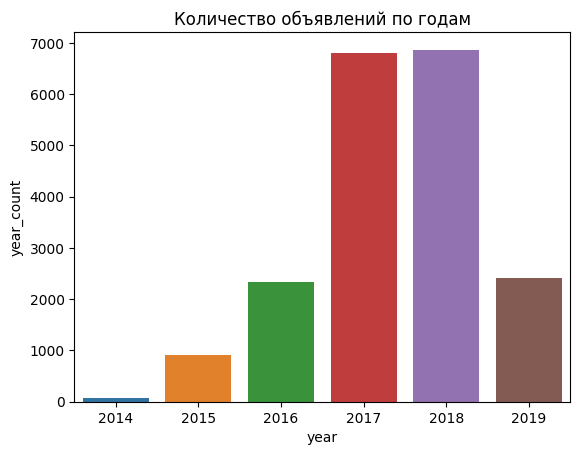

In [ ]:
sb.barplot(x=year_count.index,y=year_count['year_count'])
plt.title('Количество объявлений по годам');

In [ ]:
round(pd.DataFrame(data['year'].describe()))

,year
count,19437.0
mean,2017.0
std,1.0
min,2014.0
25%,2017.0
50%,2017.0
75%,2018.0
max,2019.0


Как видно медианной времени выставления является 2017

In [ ]:
data_cor=data[['last_price','total_area','living_area','kitchen_area','rooms','floors_category','first_day_exposition']].sort_values(by='last_price')
data_cor.corr().query('index=="last_price"')


,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.0,0.682949,0.540075,0.469668,0.417555


Данные применились и посчитали корреляцию только от колличтевенных переменных (в таблицу кореляции не вошли 'floors_category' и 'first_day_exposition' - это категорияальные переменные)

In [ ]:
price_t_area=data['total_area'].corr(data['last_price'])
print('Коэффициент кореляции:',round(price_t_area,2))

Коэффициент кореляции: 0.68


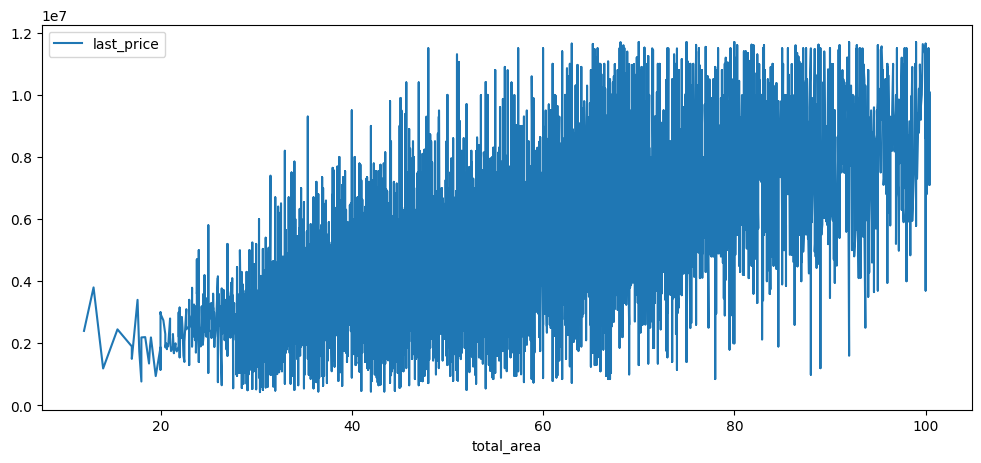

In [ ]:
data.sort_values(by='total_area').plot(x='total_area', y='last_price',figsize=(12, 5));

### Коррелиция на лицо и причем сильная - 0,65 - есть четкая положительная зависимость цены от общей площади

In [ ]:
price_l_area=data['living_area'].corr(data['last_price'])
print('Коэффициент кореляции:',round(price_l_area,2))

Коэффициент кореляции: 0.54


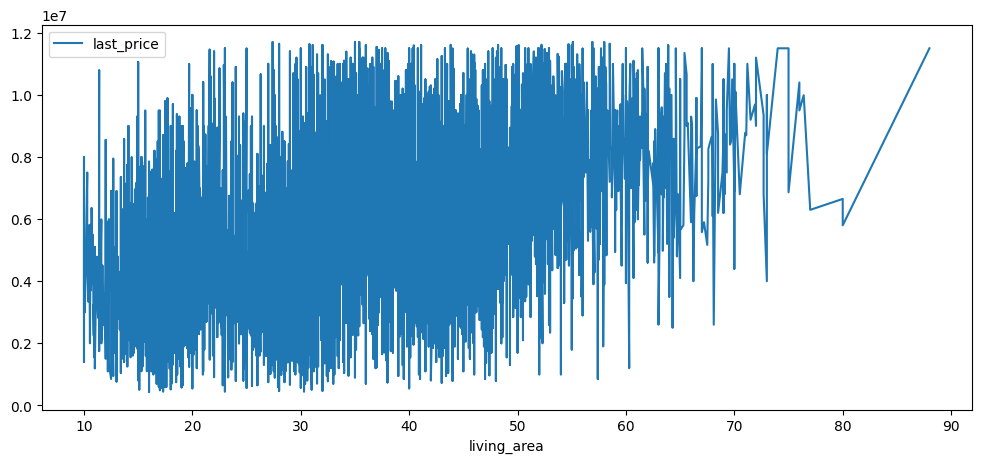

In [ ]:
data.sort_values(by='living_area').plot(x='living_area', y='last_price',figsize=(12, 5));

Коррелиция на лицо и причем сильная - 0,57 - есть четкая положительная зависимость цены от жилой площади

In [ ]:
price_k_area=data['kitchen_area'].corr(data['last_price'])
print('Коэффициент кореляции:',round(price_k_area,2))

Коэффициент кореляции: 0.47


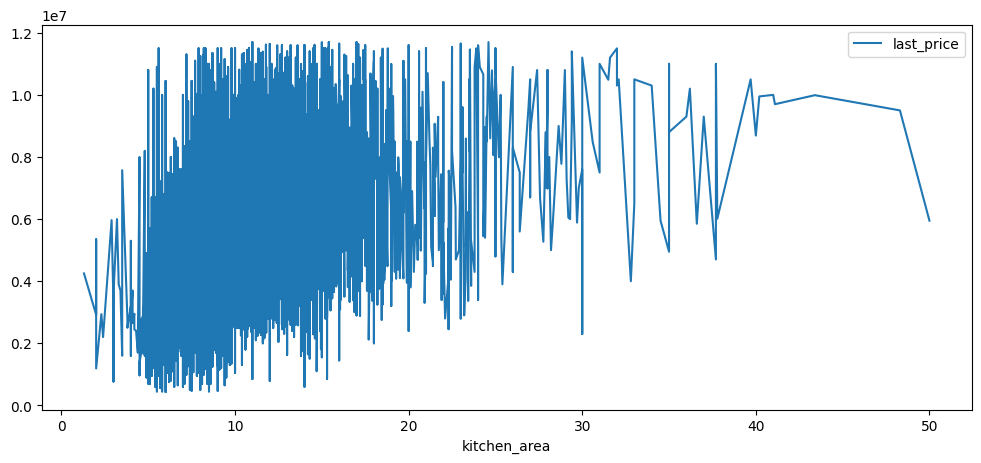

In [ ]:
data.sort_values(by='kitchen_area').plot(x='kitchen_area', y='last_price',figsize=(12, 5));

Коррелиция на лицо и причем сильная - 0,52 - есть четкая положительная зависимость цены от площади кухни

In [ ]:
price_rooms=data['rooms'].corr(data['last_price'])
print('Коэффициент кореляции:',round(price_rooms,2))

Коэффициент кореляции: 0.42


In [ ]:
data_gp=pd.DataFrame(data.groupby('rooms')['last_price'].median())
data_gp

,last_price
rooms,
0,2900000.0
1,3599999.0
2,4700000.0
3,5650000.0
4,6300000.0
5,6300000.0
6,6482000.0


Что бы график выглядел нагляднее, запомним что у 12-комнатных квартир - медианная стоимость около 420 000 000 рублей. Примени plt.ylim()

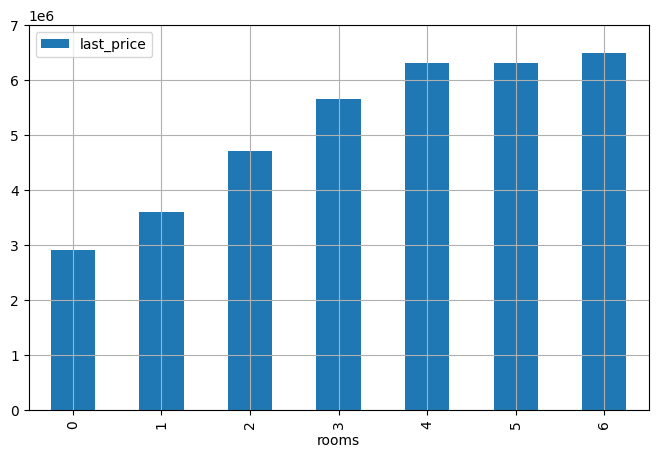

In [ ]:
data_gp.reset_index().plot(x='rooms', y='last_price',figsize=(8, 5),style='o-',grid=True,kind='bar')
plt.ylim(0,7000000);

In [ ]:
price_floor_c_data=data.pivot_table(index='floors_category', values='last_price',aggfunc='median').reset_index()
price_floor_c_data

,floors_category,last_price
0,другой,4550000.0
1,первый,3840000.0
2,последний,4000000.0


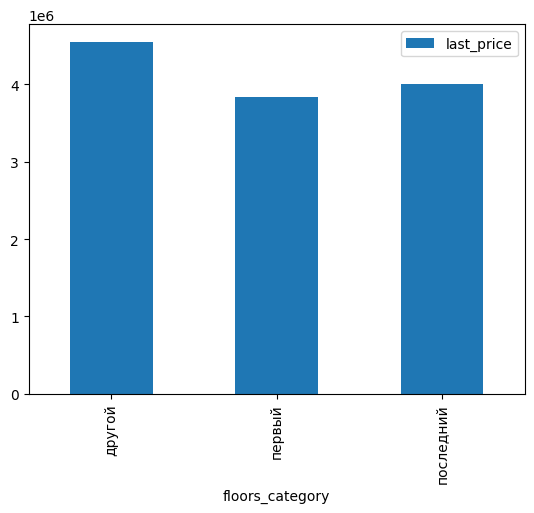

In [ ]:
######hw.plot(x='height', y='weight', kind='scatter')
price_floor_c_data.plot(x='floors_category', y='last_price',kind='bar');

Не видно четкой зависомости продажной цены от даты продажи

In [ ]:
data.pivot_table(index='weekday',values='last_price',aggfunc=['mean','sum','count']).describe()

,mean,sum,count
,last_price,last_price,last_price
count,7.000000e+00,7.000000e+00,7.000000
mean,4.762519e+06,1.324182e+10,2776.714286
std,3.681756e+04,4.384041e+09,910.344571
min,4.684718e+06,6.551367e+09,1374.000000
25%,4.759025e+06,1.081891e+10,2278.000000
50%,4.776093e+06,1.546201e+10,3230.000000
75%,4.785049e+06,1.613579e+10,3387.500000
max,4.788674e+06,1.676994e+10,3502.000000


In [ ]:
data_week=pd.DataFrame(data.groupby('weekday')['last_price'].mean()/1000000)
print('Средняя цена в млн.руб')
display(data_week)

Средняя цена в млн.руб


,last_price
weekday,
0,4.783097
1,4.776093
2,4.787001
3,4.788674
4,4.749952
5,4.684718
6,4.768098


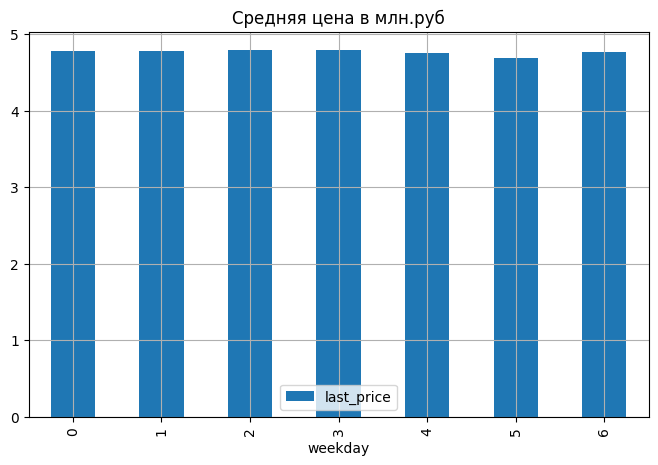

In [ ]:
data_week.reset_index().plot(x='weekday', y='last_price',figsize=(8, 5),style='o-',grid=True,kind='bar')
plt.title('Средняя цена в млн.руб');

видно что значения почти не отличаются средняя цена объявления - 6,5 миллионов

In [ ]:
data_week2=pd.DataFrame(data.groupby('weekday')['last_price'].sum()/1000000)
data_week2

,last_price
weekday,
0,14306.244174
1,16563.489802
2,15462.011943
3,16769.937069
4,15708.090049
5,7331.583903
6,6551.366528


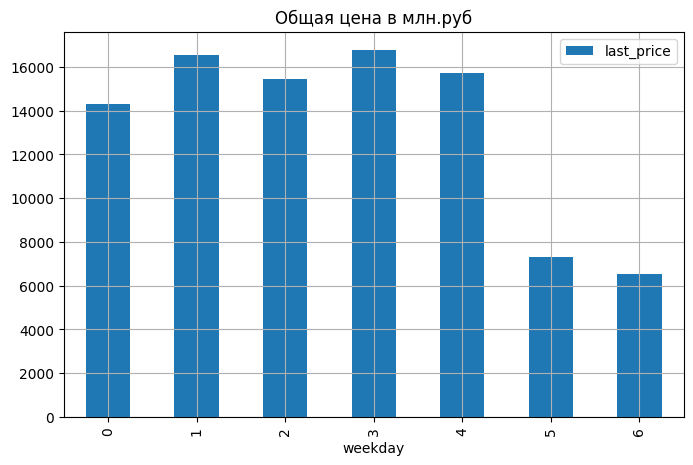

In [ ]:
data_week2.reset_index().plot(x='weekday', y='last_price',figsize=(8, 5),style='o-',grid=True,kind='bar')
plt.title('Общая цена в млн.руб');

In [ ]:
data_week3=pd.DataFrame(data.groupby('weekday')['last_price'].count())
data_week3

,last_price
weekday,
0,2991
1,3468
2,3230
3,3502
4,3307
5,1565
6,1374


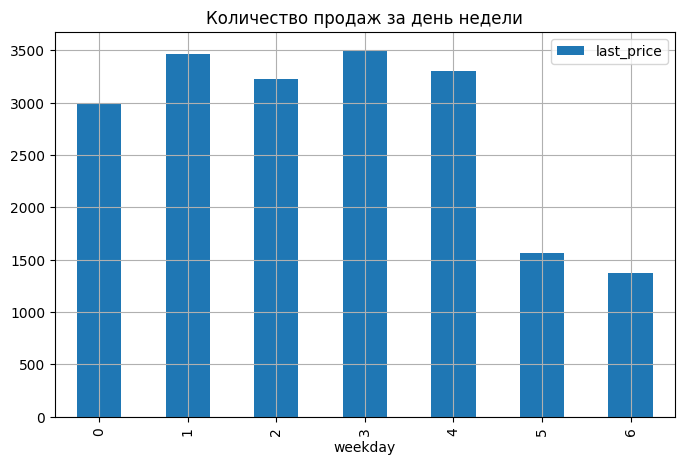

In [ ]:
data_week3.reset_index().plot(x='weekday', y='last_price',figsize=(8, 5),style='o-',grid=True,kind='bar')
plt.title('Количество продаж за день недели');

Из трех графиков что выше можно сделать вывод что так как на первом значения почти одинакоые - то есть средняя цена при выставлении объявлении одинаковая в любой день недели. Из 2 го графика понятно чтовсе таки сумарно есть некоторая совокупность условий для дня выставлния на продажу. Но все таки первопричной 2 грфика является 3 график (они являются подобными по форме) ((далее не будем рисовать первые 2 графика))

На графике виден четкий тренд увеличения числа объявлений с воскресенья по среду-четверг и снижение числа новых объявлени с четверга по воскресенье

In [ ]:
data.pivot_table(index='month',values='last_price',aggfunc=['mean','sum','count']).describe()

,mean,sum,count
,last_price,last_price,last_price
count,1.200000e+01,1.200000e+01,12.000000
mean,4.768118e+06,7.724394e+09,1619.750000
std,7.233496e+04,1.811723e+09,377.397578
min,4.630519e+06,5.022246e+09,1067.000000
25%,4.730960e+06,6.392790e+09,1339.000000
50%,4.759171e+06,7.442321e+09,1556.500000
75%,4.803855e+06,9.477485e+09,1981.500000
max,4.907611e+06,1.014669e+10,2115.000000


In [ ]:
data_month=pd.DataFrame(data.groupby('month')['last_price'].mean()/1000000)
print('Средняя цена в млн.руб')
display(data_month)

Средняя цена в млн.руб


,last_price
month,
1,4.804385
2,4.797490
3,4.739721
4,4.854743
5,4.706885
6,4.630519
7,4.734895
8,4.759445
9,4.803678


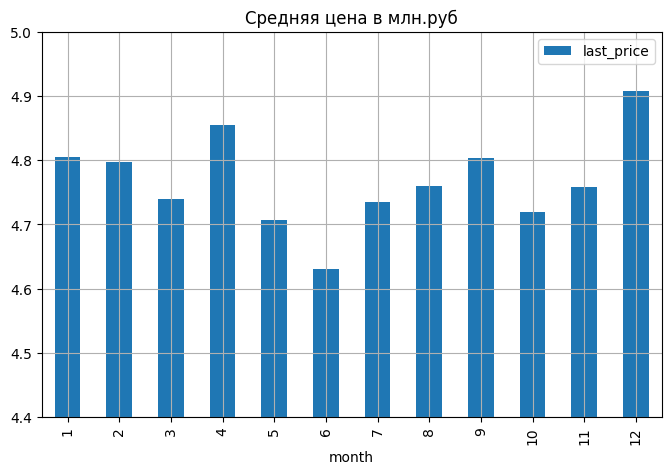

In [ ]:
data_month.reset_index().plot(x='month', y='last_price',figsize=(8, 5),style='o-',grid=True,kind='bar')
plt.ylim(4.4,5)
plt.title('Средняя цена в млн.руб');

Средняя цена выше зимой

In [ ]:
data_month3=pd.DataFrame(data.groupby('month')['last_price'].count())
data_month3

,last_price
month,
1,1178
2,2115
3,2108
4,1992
5,1067
6,1457
7,1378
8,1456
9,1656


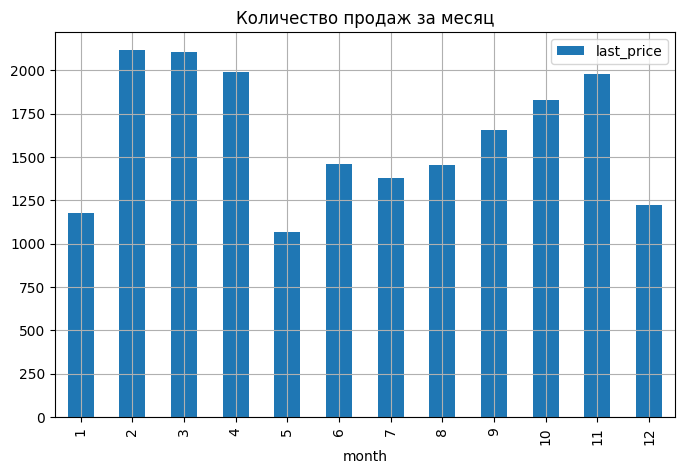

In [ ]:
data_month3.reset_index().plot(x='month', y='last_price',figsize=(8, 5),style='o-',grid=True,kind='bar')
plt.title('Количество продаж за месяц');

На графике виден тренд: 1)начиная с февараля (в феврале - пик) - снижается колличетсво новых объвлений по месяцам по май
2)начиная с мая (минимум) - с каждым месяцем увеличивается колличество новых объявлений по ноябрь
3)начиная с ноября (пик) снижается колличетсво новых объявлений с каждым месяцем

In [ ]:
data.pivot_table(index='year',values='last_price',aggfunc=['mean','sum','count']).describe()

,mean,sum,count
,last_price,last_price,last_price
count,6.000000e+00,6.000000e+00,6.000000
mean,4.957100e+06,1.544879e+10,3239.500000
std,3.402776e+05,1.368396e+10,2924.798711
min,4.660917e+06,4.494227e+08,81.000000
25%,4.695814e+06,6.198969e+09,1273.250000
50%,4.894757e+06,1.158032e+10,2380.000000
75%,5.059368e+06,2.696291e+10,5712.000000
max,5.548429e+06,3.258704e+10,6869.000000


In [ ]:
data_year=pd.DataFrame(data.groupby('year')['last_price'].mean()/1000000)
print('Средняя цена в млн.руб')
display(data_year)

Средняя цена в млн.руб


,last_price
year,
2014,5.548429
2015,5.045441
2016,4.660917
2017,4.679728
2018,4.744073
2019,5.064011


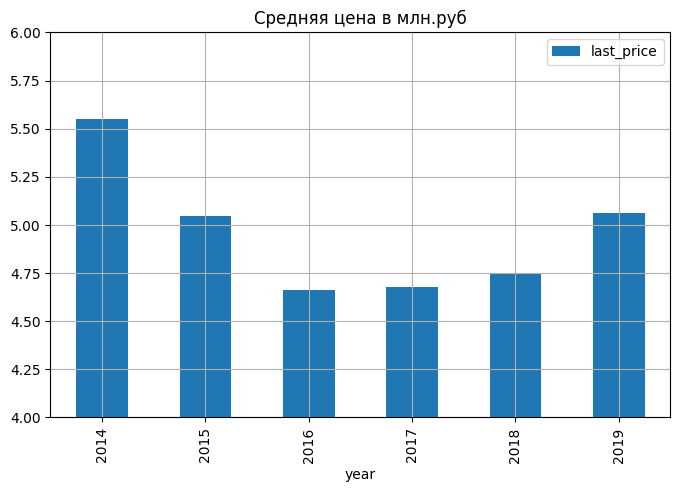

In [ ]:
data_year.reset_index().plot(x='year', y='last_price',figsize=(8, 5),style='o-',grid=True,kind='bar')
plt.ylim(4,6)
plt.title('Средняя цена в млн.руб');

С 2014 по 2018 год нисходящий тренд по средней цене опубликования - возможно из-за массовой застройки - цены на недвижимость упали

In [ ]:
data_year2=pd.DataFrame(data.groupby('year')['last_price'].sum()/1000000)
print('Общая цена в млн.руб')
display(data_year2)

Общая цена в млн.руб


,last_price
year,
2014,449.422746
2015,4626.669707
2016,10915.867943
2017,31868.948850
2018,32587.035901
2019,12244.778321


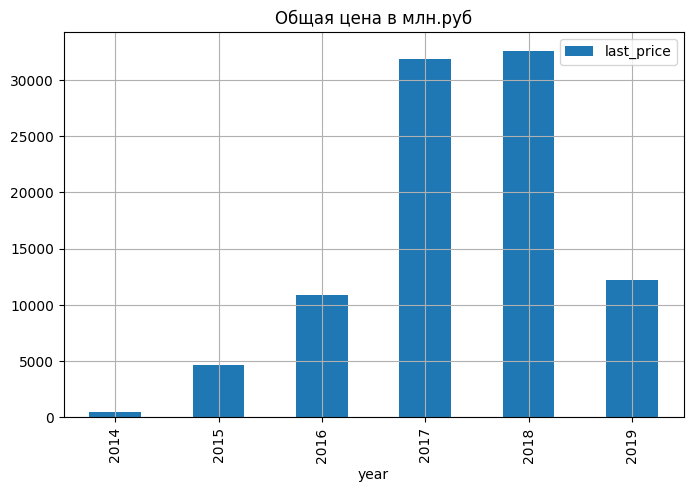

In [ ]:
data_year2.reset_index().plot(x='year', y='last_price',figsize=(8, 5),style='o-',grid=True,kind='bar')
plt.title('Общая цена в млн.руб');

Тут же видим противоположный восходящий тренд на увеличений общей суммы выставленных за год на продажу объявлений

In [ ]:
data_year3=pd.DataFrame(data.groupby('year')['last_price'].count())
data_year3

,last_price
year,
2014,81
2015,917
2016,2342
2017,6810
2018,6869
2019,2418


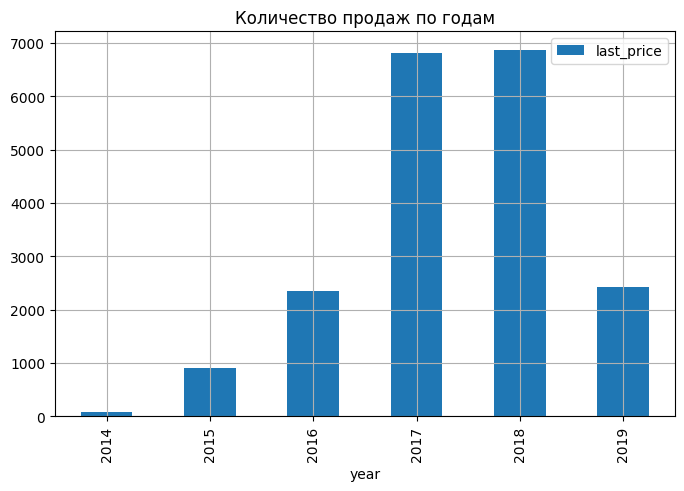

In [ ]:
data_year3.reset_index().plot(x='year', y='last_price',figsize=(8, 5),style='o-',grid=True,kind='bar')
plt.title('Количество продаж по годам');

Гипотеза и на этот раз подтвердилась - графики сумм и количества подобны и наблюдается восходящий тренд который может говорить о увеличений колличетва квартир на рынке - о массовой застройке в какой-то промежуток времени, но в 2018 видимо произошло перенасыщение рынка - предлодение превысило спрос и что говорит о смещении цены к равновесной в 2019 - среднеквартирная цена упала

In [ ]:
data_ten_sq_m=data.pivot_table(index='locality_name',values='price_per_square_meter',aggfunc=['sum','count','mean'])# попытки в строку---:.sort_values(by={'price_per_square_meter':'count'},ascending=False).query('index<=10').head(20)
data_ten_sq_m['sum']=data_ten_sq_m['sum']/1000000
data_ten_sq_m.columns=['sum_str_mln_rub','count_str','mean_price_square_meter']
data_ten_sq_m['mean_price_square_meter']=round(data_ten_sq_m['mean_price_square_meter'],2)
data_ten_sq_m=data_ten_sq_m.sort_values(by='count_str',ascending=False).reset_index().query('index<=9').sort_values(by='count_str',ascending=False)
data_ten_sq_m

,locality_name,sum_str_mln_rub,count_str,mean_price_square_meter
0,Санкт-Петербург,1311.063063,12414,105611.65
1,Мурино,44.634991,516,86501.92
2,Кудрово,39.058339,409,95497.16
3,Шушары,31.284033,396,79000.08
4,Всеволожск,24.765028,368,67296.27
5,Колпино,24.226337,322,75237.07
6,Пушкин,31.365819,311,100854.72
7,Парголово,26.892280,297,90546.40
8,Гатчина,19.538283,285,68555.38
9,Петергоф,15.813013,190,83226.38


In [ ]:
data_min_ten=data_ten_sq_m.sort_values(by='mean_price_square_meter').reset_index(drop=True).query('index<=2')
data_min_ten

,locality_name,sum_str_mln_rub,count_str,mean_price_square_meter
0,Всеволожск,24.765028,368,67296.27
1,Гатчина,19.538283,285,68555.38
2,Колпино,24.226337,322,75237.07


In [ ]:
print('Самые дешевые кв.м из топа:')
for x in data_min_ten['locality_name'].index:
  print(f'{x+1}){data_min_ten.loc[x,"locality_name"]}')

Самые дешевые кв.м из топа:
1)Всеволожск
2)Гатчина
3)Колпино


Самые дешевые квадратные метры жилья в Выборге, Всеволожске и Гатчине.

In [ ]:
data_max_ten=data_ten_sq_m.sort_values(by='mean_price_square_meter',ascending=False).reset_index(drop=True).query('index<=2')
data_max_ten

,locality_name,sum_str_mln_rub,count_str,mean_price_square_meter
0,Санкт-Петербург,1311.063063,12414,105611.65
1,Пушкин,31.365819,311,100854.72
2,Кудрово,39.058339,409,95497.16


In [ ]:
print('Самые дорогие кв.м из топа:')
for x in data_max_ten['locality_name'].index:
  print(f'{x+1}){data_max_ten.loc[x,"locality_name"]}')

Самые дорогие кв.м из топа:
1)Санкт-Петербург
2)Пушкин
3)Кудрово


Самые дорогие квадратные метры жилья в Санкт-Петербурге, Пушкине и Кудрово.

In [ ]:
data_price_km=data.query('locality_name=="Санкт-Петербург"').groupby('km_cityCenters_nearest_km')['last_price'].mean().reset_index()
data_price_km['last_price']=data_price_km['last_price']/1000000
data_price_km=data_price_km.rename(columns={'last_price':'last_price_mln_rub'})
data_price_km

,km_cityCenters_nearest_km,last_price_mln_rub
0,0.0,7.841429
1,1.0,7.883329
2,2.0,7.742070
3,3.0,7.105312
4,4.0,7.252602
5,5.0,7.422443
6,6.0,6.914727
7,7.0,6.548469
8,8.0,6.474433
9,9.0,5.471574


In [ ]:
print(f'Корреляция между растояние и ценой равна {round(data_price_km.corr().loc[data_price_km.columns[0],data_price_km.columns[1]],2)}')

Корреляция между растояние и ценой равна -0.92


 Это очень сильная обратная зависимость - с уверенстью можно сказать что параметры связаны, что так же следует из повседневного опыта

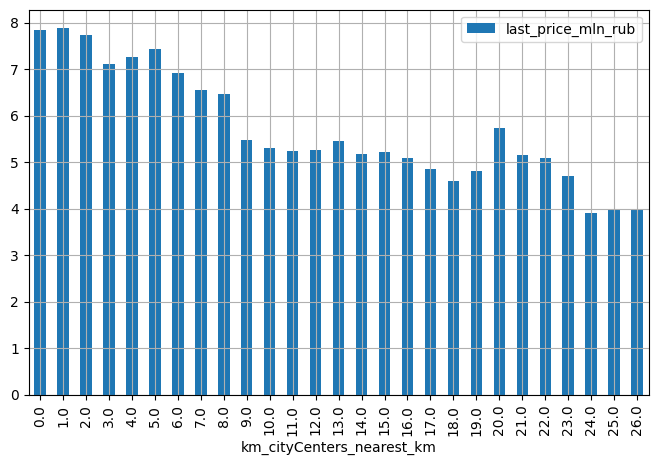

In [ ]:
data_price_km.plot(x='km_cityCenters_nearest_km', y='last_price_mln_rub',figsize=(8, 5),style='o-',grid=True,kind='bar');

Я бы сказал что центр города заканчивается на 8м километре

В основном все гистограммы имеют распределения паусонна. Есть значения по дате объявления которые можно назвать слишком долгими - возможно из-за их некачественности. Обычно продажа занимает до 3 месяцев. Значение цены в среднем значимо коррелирует со значениями разных типов площадей и количества комнат. Что не удивительно все корреляции положительные. Так же не стоит забывать и о типе этажа - здесь тоже все логично на первых и последних этажах квартира продается с дисконтом. Смотря на стоимость квадратного метра жилья в топ 10 городах по объявлением тоже не приходится удивляется, о Питере тут и говорить нечего,  а вот по остальным топ 3 по квадратным метрам - это развитые сателиты Питера(они плотно прилегают к Питеру), но при этом и самостоятельно развитые города со своей историей и культурным наследием. Но самое главное показывает корреляция расстояния от центра и цены - она хоть и отрицательная (что тоже логично), но самая большая в исследовании - аж -0,8

### Общий вывод

В отчете был проанализирован архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Были обнаружены и обработаны пропущенные значения и заполнены пропуски. Данные были приведены к нужному типу. Посчитали и добавили в таблицу цену квадратного метра, день недели, месяц и год публикации объявления, категории по этажам квартиры, соотношение жилой и общей площади, а также отношение площади кухни к общей. Провели исследовательский анализ данных. Изучили следующие параметры: площадь, цена, число комнат, высота потолков и построили гистограммы для каждого параметра. Аномальных значений не обнаружено.

Изучили время продажи квартиры. Построили гистограммы. Посчитали среднюю и медиану. Определили аномально короткие значения равные нулю. Среднее значение времени продажи квартиры равно 180 дней, медианное равно 102 дня. Диаграмма размаха охватывает диапазон от 1 до 531 дней. Значит продажи более 531 дней являются аномально долгими.

Изучили факторы, которые больше всего влияют на стоимость квартиры. Цена зависит от площади квартиры. Чем выше площадь, тем выше стоимость. Цена не зависит от количества комнат. Чем ближе квартира к центру, тем выше разброс цен. Цена квартиры зависит от этажа. На первом и последнем этажах квартиры дешевле. Во вторник публикуют объявления с наибольшей ценой. К выходным цена снижается и в воскресенье достигает минимума. Наибольшая цена на квартиры устанавливается в апреле, наименьшая - в июне. Обычно летом покупательная активность снижается. С 2014 года медианная цена квартир снижается. В 2017 году стоимость достигла минимума и затем начала повышаться.

Были выбранны десять населенных пунктов с наибольшим числом объявлений и была посчитана средняя стоимость квадранго метра. Наибольшую среднюю стоимость квадратного метра имеет Санкт-Петербург, а наименьшую - Выборг.

Цена зависит от площади квартиры. Чем больше площадь, тем дороже цена. Количество комнат и высота потолков слабо влияет на цену. Цена квартиры зависит от этажа. На первом этаже квартиры дешевле. На последнем этаже цена выше. А еще выше цены между. При это по медианныным значениям можно заметить зависимость цены от удаленности от центра: чем дальше от центра, тем дешевле.

Сравнивая данные по всей базе и объявлениям можно сделать следующие выводы: Цена квартиры зависит от её площади. Чем выше площадь, тем выше стоимость. Количество комнат. Цена квартиры зависит от этажа. На первом и последнем этажах квартиры дешевле. Чем дальше квартира от центра, тем дешевле.

Таким образом, есть параметры, которые едины для всего рынка, не зависят от локального сегмента, но влияют на стоимость, такие как площадь, этажность и удаление от центра. И есть параметры которые необходимо учитывать в зависимости от региона: день и месяц публикации и особенности регионального изменения стоимости квартиры.

https://www.python-graph-gallery.com/

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод